Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\HARSHIT\anaconda3\envs\rstudio\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  Futu

Cluster 0 Mean: [-1.7573305 -2.367163 ]
Cluster 1 Mean: [ 0.47326753 -1.2743634 ]
Cluster 2 Mean: [0.4042549 1.627832 ]
Cluster 3 Mean: [-3.4984424  5.0300756]
Cluster 4 Mean: [ 17.690928 -10.500578]


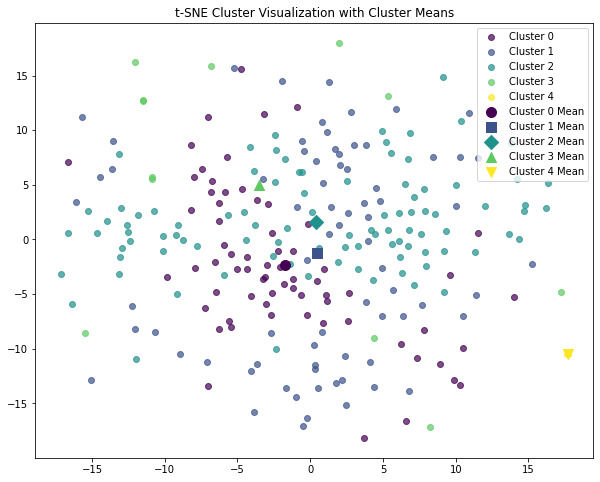

C:\Users\HARSHIT\anaconda3\envs\rstudio\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\HARSHIT\anaconda3\envs\rstudio\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


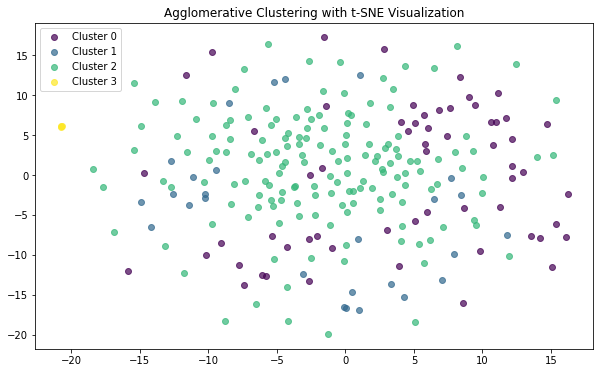

C:\Users\HARSHIT\anaconda3\envs\rstudio\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\HARSHIT\anaconda3\envs\rstudio\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


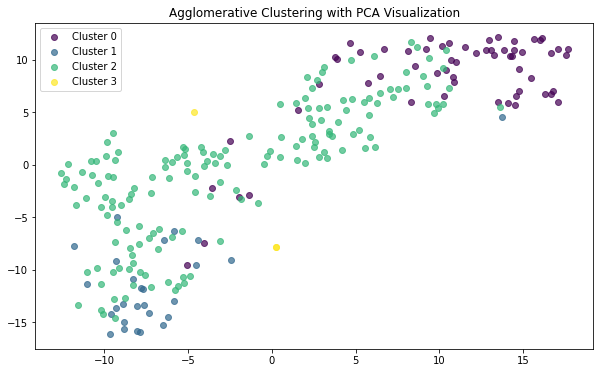

In [2]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Load the language model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

vls= [{"vl_id":25212,"author":"Nicolas Kübler","content":" You guys recalling my first VoiceLine in the Daily Check In channel.","creation_date":"2023-04-28 15:57:08.830848 +0200 CEST"},{"vl_id":25215,"author":"Nicolas Kübler","content":" I'm cooking Also and weirdos.","creation_date":"2023-04-28 16:12:46.166734 +0200 CEST"},{"vl_id":25994,"author":"Nicolas Höflinger","content":" Hey guys, this don't know. Good morning. And today I'm focusing on open calls, doing 3 demo calls and working on an e-mail for ****. Basically that's it. Take care guys. Bye bye.","creation_date":"2023-05-25 17:35:58.667826 +0200 CEST"},{"vl_id":26003,"author":"Daniel Thranholm","content":" Hey guys. I just finished the last feedback on the onboarding deck. So now I'll finalize it and crush it in file size so it can be shared via e-mail. Then I have some stuff to do in the sales tech and then probably moving on to. Finally cleaning up. Finally, cleaning up the components and all like the sign organization for the tagging updates, we're ready for the next project. Yeah, excited about that? Cool. I think that's it for me today. Bye.","creation_date":"2023-05-26 08:10:12.483282 +0200 CEST"},{"vl_id":26061,"author":"Nicolas Kübler","content":" Morning peeps, Not sure if we're gonna do a real check in today. Anyhow, it's very straightforward this week, today and tomorrow. Will be our product workshop week. So Um. We're going to spend both days. On finding a good solution, or at least a good solution draft. 4. Entity recognition. Basically, we want to understand what information lies within deals. Yeah, so pretty excited for that one and also for the rest of the week. Bye, bye.","creation_date":"2023-05-30 08:08:49.883857 +0200 CEST"},{"vl_id":26063,"author":"Lorenz Westner","content":" Good morning boys and girls. So today we're gonna have this amazing kick off meeting and when I'm going to. And do some async kick off work. And. Afterwards, I know. Let's see. Maybe. Maybe it's something else. If anything, we go to a gym for sure today. And I'm also. Thanks here, wants to do the animations, so maybe a little bit. Today or later. See, see.","creation_date":"2023-05-30 08:33:10.545839 +0200 CEST"},{"vl_id":26064,"author":"Sebastian Maurischat","content":" Hi after the workshop I will really focus on the integration parts again. Yeah. And that's it. So I'm trying to. Actually I'm trying to.","creation_date":"2023-05-30 08:35:43.840311 +0200 CEST"},{"vl_id":26065,"author":"Daniel Thranholm","content":" Yo-yo, yo. Yeah. Doing kickoff. Awesome. Excited. Super nice. Yeah, probably working on that. Also after the kickoff. Other than that, there might be some animation stuff going on, some e-mail stuff. And possibly just Um. A little more slide work to be done right.","creation_date":"2023-05-30 08:38:15.066062 +0200 CEST"},{"vl_id":26079,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm going to. The before midday continue with her front end recorder. And building the post Recording shared suggested thing and afterwards I'm going to. Going to get feedback from Nick, from Leno and Daniel and then let's see. Bye, bye.","creation_date":"2023-05-31 08:23:15.583839 +0200 CEST"},{"vl_id":26080,"author":"Daniel Thranholm","content":" Hello. So yeah, I'm spending my day before midday on doing wireframes based on the talks we had yesterday. And then we catching up after midday and then probably reiterating some of the stuff based on our talks. Yeah, I think that's the date for me. Cool. Bye.","creation_date":"2023-05-31 08:25:34.662859 +0200 CEST"},{"vl_id":26081,"author":"Sebastian Maurischat","content":"Hello nothing done yesterday so the message is still the same what I'm doing so the I'm continuing less you want. Continuing with. CRM integrations and Next up is the is trying to or at least checking if the credentials that provided us is actually working. Bye bye. ","creation_date":"2023-05-31 08:25:40.771299 +0200 CEST"},{"vl_id":26082,"author":"Nicolas Höflinger","content":" Good morning, people. So on my end, basically following up and reaching out to new and existing Leads, that's basically the focus of the day. Um, yeah, that's mainly it. Take care. Bye bye.","creation_date":"2023-05-31 08:38:09.353414 +0200 CEST"},{"vl_id":26083,"author":"Nicolas Kübler","content":" Hey morning peeps. I am now today focusing on nailing down the real information that users want to have. I guess it's actually in preparation for the primitives as well, so I wanna. Write down the individual information pieces. And define them correctly. And then we can talk about it after lunch.","creation_date":"2023-05-31 08:39:32.751386 +0200 CEST"},{"vl_id":26094,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm going to work probably on some home screen animations of Daniel. And the rest of the day I'm going to do the recorder stuff. That's it for me. Bye bye.","creation_date":"2023-06-01 08:00:15.641093 +0200 CEST"},{"vl_id":26096,"author":"Nicolas Höflinger","content":" So good morning, everybody. One demo call in the morning and then one larger follow-up call with the full sales team of Germany If PMAX. And then Max is starting today, so I'm gonna spend some time Onboarding with him. And working with him and. And Yep, trying to push further on the outbound, of course, that's. The main part of the day already sent out the investor update for the month. I did that yesterday. Yep, going pretty good. Let's see. Take care. Bye. Bye.","creation_date":"2023-06-01 08:37:16.414639 +0200 CEST"},{"vl_id":26097,"author":"Sebastian Maurischat","content":" Morning. So the gets objects from. So for best be on is working fine and now I'm continuing with the post for. Updating texts. Yeah, and I think. That's it. Hopefully if there is no more things concerning PCG.","creation_date":"2023-06-01 08:42:40.511974 +0200 CEST"},{"vl_id":26099,"author":"Daniel Thranholm","content":" Yo-yo, so I am working on. Yeah, the new project all day today. Yeah, with, you know, doing. I didn't ration and moving on. Yeah. Bye.","creation_date":"2023-06-01 09:31:21.527434 +0200 CEST"},{"vl_id":26115,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm going to keep on working on the recorder. Maybe check out the e-mail stuff Daniel later. And that's it for me. Bye, bye.","creation_date":"2023-06-02 08:17:12.460442 +0200 CEST"},{"vl_id":26116,"author":"Nicolas Höflinger","content":" Good morning boys and girls. So I have 3 demo calls today. And I'm going to push on the outbound piece with the Bundesverband there that reps manager, that's Um core focus of the day. And Yep, take care guys. Bye, bye.","creation_date":"2023-06-02 08:28:04.938487 +0200 CEST"},{"vl_id":26118,"author":"Daniel Thranholm","content":" Hey guys so for me today I'll be working on the keep working on the new project documentation finishing up our thoughts from yesterday. Getting the next step set in and then some. Like e-mail work later today with with Lawrence? Yeah, that's it for me. Bye.","creation_date":"2023-06-02 08:45:10.58543 +0200 CEST"},{"vl_id":26119,"author":"Nicolas Höflinger","content":" Hi guys it's Marx. Was a pretty fun evening yesterday with lots of beer. I think four months in the end. So a strong a strong team effort from everybody except for ZAP Um going to do my first cold calls today. The proper ones. I've selected 20 leads to just call and start getting into the groove and then I'm going to join Nico on some demo calls. I also still need to get the the test flight app installed. So that I can do these checkins from my own device. Yep. Thanks.","creation_date":"2023-06-02 08:59:43.129322 +0200 CEST"},{"vl_id":26121,"author":"Nicolas Kübler","content":" You guys. For me today, I think I will discuss with Daniel how to continue from our exploration yesterday. It's actually pretty straightforward I think in mapping out user flows now and testing stuff. And then for me it's more about hypothesis testing. So I'll try to reach out to SRAM managers again, get some call scheduled, pitch them what we are trying to do and see how they react if they comply with it or if they're against that. Yeah, and then there's also playing. I think we're gonna move it some steps. Not here. And then some other calls, yeah, but I think pretty straightforward they.","creation_date":"2023-06-02 09:17:42.305438 +0200 CEST"},{"vl_id":26156,"author":"Sebastian Maurischat","content":" OK guys, so today I'm back to. Posting. No so Tag updates should ohh so complicated. Holy ****. So Tag updates should go to. Through SAP.","creation_date":"2023-06-06 08:28:12.076401 +0200 CEST"},{"vl_id":26157,"author":"Daniel Thranholm","content":" Hey guys. Yeah, yesterday went with some. Reiterating on wireframes for the documentation Update, which is very cool. A lot of good feedback from Yeah dev and product, so very nice. And yeah, today I'm just head down working on building the click dummy prototype. So yeah, that's it for me. Bye.","creation_date":"2023-06-06 08:29:22.579078 +0200 CEST"},{"vl_id":26160,"author":"Nicolas Kübler","content":" Hello hello hello. I will today spend my time on outreach for CRM managers. There is actually a **** ton of smaller tasks as well that I have to address. Um. But again, main goal should be to verify against their managers, so I focus on that and then everything else is on the site like Serum 1 pager sales decks. Travel, travel routes to hinterland of things and whatever the **** no. Yeah, but your managers will be it. Bye bye.","creation_date":"2023-06-06 08:48:07.98112 +0200 CEST"},{"vl_id":26194,"author":"Nicolas Kübler","content":" Morning, guys. Today it's all about CRM managers. So yesterday I actually managed to draft down a first version content pieces and I discussed with Daniel. So we'll spend some time today to bring it on the slides. Then I'll Also transform a IT into A1 pager format that we can send out. And I am also going to reach out to CRM managers to get interviews scheduled hopefully. Yeah. We also have product grooming and stuff, but that's my main task for today. Bye bye.","creation_date":"2023-06-07 08:26:06.376199 +0200 CEST"},{"vl_id":26195,"author":"Lorenz Westner","content":" Morning brother girl. So today I'm going to. Umm, I don't know actually. I guess I'm going to continue on the front end recorder a little bit today. I think one day is probably enough to make more progress, but after that I'm probably. Also trying to improve his suggest thing a little bit. And to find names and drawn. I've made some goals yesterday, but we're not there yet. Bye, bye.","creation_date":"2023-06-07 08:32:05.59024 +0200 CEST"},{"vl_id":26196,"author":"Daniel Thranholm","content":" Hello guys so I am continuing to work on the designs for the documentation though still a lot of work to do there and then also doing a little bit of a detour today doing a couple of slides for serum managers based on Dinos awesome content from yesterday and then also taking some time off to contact some. Um, some people to Test this, click that me on early next week. Yeah, that's it for me. Bye.","creation_date":"2023-06-07 08:33:19.278594 +0200 CEST"},{"vl_id":26197,"author":"Max Luedecke","content":" Hey everybody. Today I'll be focusing on some more cold calling. I have only one one demo call today, so I've I have some time for a big push. Um, Yep, that's it for me.","creation_date":"2023-06-07 08:43:33.003141 +0200 CEST"},{"vl_id":26198,"author":"Nicolas Höflinger","content":" Hey, guys, good morning. So quite a few calls today. I have three or four demo calls today and then the update call with Pricewaterhouse Coopers and the update call with Cavalry Ventures and we have company Update today. And if I find time, I'm gonna do also outbound cold calling and hope to finish the ROI calculation where I didn't get too much yesterday since I had a. Conversation with the soon to be CEO of which was cool and good insights there and that's a Take.","creation_date":"2023-06-07 08:45:14.229678 +0200 CEST"},{"vl_id":26199,"author":"Max Luedecke","content":" So I'm just doing a test recording so I can show you the bug that Nico and I found this morning.","creation_date":"2023-06-07 08:46:19.475638 +0200 CEST"},{"vl_id":26200,"author":"Sebastian Maurischat","content":" Hi, Morning. Only little progress on the SAP push stuff. For best beyond Um, I wanted to. Fix the outstanding Flutter bug with the keyboard extension, which would block ****. And I having floral problem with getting the environment to run again as we always have with flutter apparently. Trying to fix that now.","creation_date":"2023-06-07 08:47:10.6388 +0200 CEST"},{"vl_id":26270,"author":"Nicolas Höflinger","content":" Good morning, everybody. So I'm still in Berlin. I'm on the way back. First demo call at 11 in the OfficeMax, I'm not sure. I'm going to be in the office by then. My plane is landing at the round. 9:50 I might make it. I'm trying to make it, but you may have to do it. And then I have one more demo call in the afternoon. It's more of a networking type thing with an access manager from Bosch. Let's see what I can do there. And then the Onboarding call with PCG and then our deal flow, Sales deal Flow meeting. In the afternoon. That's mainly what's happening today. See you guys later. Take care. Bye, bye.","creation_date":"2023-06-09 07:26:32.890381 +0200 CEST"},{"vl_id":26271,"author":"Daniel Thranholm","content":" Hey guys so I am spending my day working head down on the documentation designs flows, click dummy. I want to push out a first version today so we can test it and there's still quite a lot of stuff to do but I will. So I'll make some some choices of what to make now and what to optimize later. But yeah, it's looking super awesome. I'm excited to to get this out. Did some good work this morning. Continue now. And yeah, I'll take a break sometime and then jump over to the serum slides and get those done as well. But yeah, that's it for me today. Cool. Bye.","creation_date":"2023-06-09 08:14:59.334258 +0200 CEST"},{"vl_id":26272,"author":"Max Luedecke","content":" Hey everybody. So I'll start the day off today by doing some more cold calling and I have a demo called 11 which I'll have to do myself I guess if if Nico is not able to to join in time as he lands only at 10. It's a pretty, pretty nice lead um and I'm looking forward to speaking with the guy in the afternoon some more cold calling then I'll be working with Nico on the **** onboarding stuff and on the we'll just take a look at our pipeline, how the deals are flowing through it. That's it for me.","creation_date":"2023-06-09 08:25:35.885481 +0200 CEST"},{"vl_id":26273,"author":"Lorenz Westner","content":" Morning guys. So my goal for today on my last day is just a push of version on staging where you can basically you know see your channels, Um and voice sounds in them and then you can record from somewhere probably home. Um, that's just for testing though. Um, so we can continue with that. Maybe. Maybe I'm putting it in channels to try it out. Um, but yeah, my last day for two weeks, right? So, um, I try to finish stuff up that helps everybody and not, you know, something else. Yeah, but to me, I hope everybody's happy with the new Um summary they get today. Bye, bye.","creation_date":"2023-06-09 08:35:16.512175 +0200 CEST"},{"vl_id":26325,"author":"Sebastian Maurischat","content":" Good morning. I'm concerning with the CRM integration. I have to figure out today how to best. Trigger the CRM update both from a summary perspective if there is a summary. Or from a pure transcription perspective, when there is none. It's not so easy because one is async and the other is not, so we have to bring it together again. Also with like. The same problem exists also with notifications, so I have to think about it a bit. Or just split it with transcription length. But make it, Um, make the method pretty general. And then bring Also the mentions into the sink into the update to the CRM. That's it by.","creation_date":"2023-06-13 07:49:29.415112 +0200 CEST"},{"vl_id":26328,"author":"Daniel Thranholm","content":" Hey guys. So I am pushing for getting the click that we're ready for handling things, the ones that are going to be used there so we can do the video then and I made some good progress this morning actually so. And then I'll move on to doing the more general, more clickable click dummy for for demos and for Testing. Then I'll be reaching out to some to some people Finally to get some Testing scheduled. And yeah, if there's more time, there's some slight stuff, Serum manager stuff. Yeah, that's it for me. Cool. Bye.","creation_date":"2023-06-13 08:23:44.605018 +0200 CEST"},{"vl_id":26329,"author":"Max Luedecke","content":" Morning guys. I'm just getting ready for the train journey to be Liefeld and also for the Internet of Things conference. I'm doing some small to do tasks just to follow up with some of my deals and leads this morning and then I'm going to spend the time on the train just researching people that are attending the the fair. I have the long list of leads of last year's attendance and also just some reading on LinkedIn and the sales books that Nico shared with me, but I'll be. Should be reachable and I'll be on the train until about 6:15 this evening. Let me know if I can help in any way.","creation_date":"2023-06-13 08:54:22.186809 +0200 CEST"},{"vl_id":26330,"author":"Nicolas Kübler","content":" Morning peeps, mainly doing outreach for serial managers. Today I'm checking out some other platforms to maybe buy interviews. Let's see. And I'm also preparing stuff for the Hinterland of Things conference tomorrow. Including probably videos and so on. Let's see, There's actually quite a pile of work to be done. Yep, that's it. See you.","creation_date":"2023-06-13 09:03:43.686982 +0200 CEST"},{"vl_id":26331,"author":"Nicolas Höflinger","content":" Good morning, boys and girls. So on my end I'm pushing the pipeline that's main, main big task for today and then. Um, taking a look now at the CRM Manager Content, I'm just sent out the **** e-mail. And I also have to do some brain work regarding the ROI for the sales managers calculation. I'm just planning about having an interactive excel sheet where we can discuss with people about their assumptions and their input what they think they're having in their team so they can get more credibility and buy in into the figures. Um, and that's it for me for today. And then I have one bigger demo call with Jira. They're called. They're doing those home. Smart home appliances and phones and stuff. Pretty cool company. Um, talking to their CRM manager there. And Yep, that's it. Take care. Bye bye.","creation_date":"2023-06-13 09:04:41.116429 +0200 CEST"},{"vl_id":26353,"author":"Sebastian Maurischat","content":" Hello, good morning and I so yesterday I progressed pretty far on the. Except for one. One case. Um. So that's in its course. It's actually working fine. Um, now I want to abstract little bits and to pull some some stuff out of the whole logic. I mean, it's a mess right now, so I need to clean it up and then pull it some stuff out so that we can reuse it also for. For other integrations and. Um. And I think then I'm actually. Pushing it at least to staging. Or to app and so we can so we could potentially test it and then I'm just continuing with Salesforce directly. Yeah. That's it. Bye.","creation_date":"2023-06-14 06:55:08.125718 +0200 CEST"},{"vl_id":26361,"author":"Nicolas Höflinger","content":" Good morning, guys. So while Max and Lino are at the hinterland. Conference. I'm going to be cheering from the back office today. I'm finishing up some thoughts on the ROI piece in the morning for sales and then maybe I'll take a look at the CRM managers Content and maybe I can even align that with Daniel if Lino is gone and then Outreach rest of the day basically. Yep, that's it. Take care guys. All the best. Much of success. Bye bye.","creation_date":"2023-06-14 08:30:34.658371 +0200 CEST"},{"vl_id":26362,"author":"Daniel Thranholm","content":" Hey, hey guys. So yeah uh great progress on the this report flow yesterday and I'm going to continue to, Yeah, put it into the full demo that I can Test and also for demo calls. So everything is up and working and you're saying on the system so it's easy to. Switch for example the the. The integration around so it always is the correct one for the demo and then reaching out to some testers and aligning with Nico on the Cerem Manager stuff so we can get that started and finished up. Yeah, so yeah, that's it for me today and go guys at Hinterland.","creation_date":"2023-06-14 08:40:30.700167 +0200 CEST"},{"vl_id":26414,"author":"Daniel Thranholm","content":" Hey guys so today I am continuing on making the bigger click dummy ready for testing and for demo purposes which is going to. Uh, be done today. And then I hopefully and then uh, I'll be. I think I have a lot of slide work to do for the serum and just it seems, but uh, yeah, I'll get to work on that as well today. And then reaching out to some more potential testers for the click time. Cool. That's it for me. Bye.","creation_date":"2023-06-15 08:16:47.08769 +0200 CEST"},{"vl_id":26415,"author":"Sebastian Maurischat","content":" Good morning, boys and girls. So. The. So the connection to the SP. Says closed version one is working fine now. We get some instability still in the whole process coming from the front end. And over to Lyra and then to the back end. Tried to fix it yesterday. Couldn't make it so the back end is working, but now I have to connect everything up.","creation_date":"2023-06-15 08:34:55.374396 +0200 CEST"},{"vl_id":26416,"author":"Nicolas Kübler","content":" Morning peeps, first order of the day I think is. Basically doing all after. Processing of the fair and getting all leads in a follow-up able state. And then I'm actually going to catch up on everything that happened on Slack. I saw Nikolas pushing a lot forward. So I think I'm going to go through all of that. Yep. And then see where to pick off again.","creation_date":"2023-06-15 09:07:15.807134 +0200 CEST"},{"vl_id":26417,"author":"Max Luedecke","content":" Morning, guys. Not sure if you can actually hear what I'm saying. The train is incredibly loud. We're on our way back from Hinterland and today it's going to be all about organizing the leads that we collected, making sure we have all the information to follow up on and that we actually do it.","creation_date":"2023-06-15 09:09:56.976339 +0200 CEST"},{"vl_id":26418,"author":"Nicolas Höflinger","content":" Good morning, guys. On my end, I'm finished up on the ROI calculations and the CRM Manager Content yesterday and had already synced with Daniel in the morning on how to proceed. Um, so that bigger Content work is now finally done and I can go back to engaging current pipeline and pushing on the Outreach. And I have one demo called Today with a larger company. Um, you give a, they're called. Let's see what that brings. And that's it. Take care. Bye bye.","creation_date":"2023-06-15 09:23:02.446797 +0200 CEST"},{"vl_id":26447,"author":"Sebastian Maurischat","content":" Morning. Yesterday I managed to test the first workflow in its. Completeness so from the So recorder voice line and then tech. Up as beyond. A lead or account? Um, as as if he calls it and then. It showed up in the SP system, right? That's what we want to have. And now I think I'm continuing directly with. Salesforce, maybe I can finalize it today and in the best case I also figure out how they do the web hooks. Hmm.","creation_date":"2023-06-16 07:39:40.849364 +0200 CEST"},{"vl_id":26449,"author":"Max Luedecke","content":" Hey everybody. I'm back in Munich and today I'll be focusing on analyzing and dissecting the leads that we collected at Hinterland Conference. That's priority #1, so we can do follow up on all the relevant leads. By today I'll be working with Lino and and Nico on that And then if there's any time left in the afternoon, I'm helping a bit on the CRM manager slide deck and maybe some **** onboarding stuff. But today probably no cold calling and only reaching out to the leads that. We collected at the conference.","creation_date":"2023-06-16 08:36:23.057246 +0200 CEST"},{"vl_id":26450,"author":"Daniel Thranholm","content":" Hey guys so for me today I am The click dummy for demo and Testing is almost done. There's a lot of design work yesterday and I'm going to finish up some design work today on it and then I'll be moving on to the desktop part which also requires a complete new design for how yeah how we do the. Structuring of the visit report, how you you structured, how you set it up basically. And yeah then I'm setting U the first tests reached out to a lot of people yesterday and if you have responded last night, so that's great. So I'm setting up the first Test as well but yeah, that's it for me. Bye.","creation_date":"2023-06-16 08:48:19.911303 +0200 CEST"},{"vl_id":26453,"author":"Nicolas Kübler","content":" Guys, I actually forgot to do my check in. **** me. So and we'll trade Longer's discussion today about. Next step after the after the fair. So I'm currently following up on the leads that we created quite a lot of really cool stuff, so that's for today. Then we also discussed what's the next steps to unblock sales which will require website for example and also have the grooming to. Discuss next steps on. Basically all the road maps also product road map, so that is still pretty much unchanged. And then of course I still have these theorem interviews, CRM manager interviews to be scheduled. Still not a single ******* guide to to reply, so I'll see how to continue from here.","creation_date":"2023-06-16 13:03:08.323049 +0200 CEST"},{"vl_id":26512,"author":"Daniel Thranholm","content":" Hey guys. Yeah so yesterday was a hectic day, got a lot of good stuff done. Did the first user Test which was very positive and also gave some areas for Like further investigation which is great. So yeah, trying to reach out to more people, got another one, had another one this night user testing but is moved to tomorrow night. But yeah, trying to get more. Also doing some reiteration on the visit report flow based on a talk with binary yesterday. Evening and Yeah, then finishing up some design on the report build as well. Yeah, a lot of Projects trying to push through on this, this report right now to to get it super nice and ready for them for when. Yeah, when Lawrence is back. So he can basically just jump in and and get it done. But yeah, I think that's it for me. Cool. Bye.","creation_date":"2023-06-20 08:45:36.886236 +0200 CEST"},{"vl_id":26513,"author":"Sebastian Maurischat","content":" I'm Morning, so from a a high level overview, still the same, still the same. So the Salesforce. Uh, web hook is executing Um against the back end correctly and now I need to forward the request to the already existing endpoint in Lyra and. Uh, transformative it so that it's so that it updates the existing database. Um. Yeah, the problem is we need to figure out which Um. Workspace and actually is while the HubSpot web hook is executing. Um. From the, yeah, from a general system perspective, right? So we have to figure out for Which workspace it actually is, which makes it different, right?","creation_date":"2023-06-20 08:50:48.509662 +0200 CEST"},{"vl_id":26514,"author":"Nicolas Höflinger","content":" Hey, guys, good morning on my end. Trying to wrap up a couple of things regarding. Material for demo and stuff. So much stuff flying around and then trying to push on Outreach on reference users. And then we have two demo calls. One would call back. And one with thats guitar style handle. And then we have one more call with this which is for intros. From a contact in sales. Um and that's hopefully it for the day. Take care. Bye bye.","creation_date":"2023-06-20 08:56:38.533631 +0200 CEST"},{"vl_id":26516,"author":"Max Luedecke","content":" Hey everybody. Today I'll be doing a big push on a cold calling once again got some open leads following up a bit on Hinterland and after that I'll be doing some small to dos and things that get left in the afternoon. There's also my first sort of demo call slash call with somebody by myself regarding basically showing the product, discussing how they could implement it and it's a lead that I got from Hinterland. Are we having that call at 2:00 PM today?","creation_date":"2023-06-20 08:57:50.671464 +0200 CEST"},{"vl_id":26535,"author":"Sebastian Maurischat","content":" Hello still on the same. Morning. Still on the same topic. Um. I mean everything is working fine but the Update. Of Laura is somehow. But I couldn't figure it out what's going on. But it's sometimes it's Updating it, sometimes it's not. It cannot find the ID. Somehow the whaler is working, there is but. And not so super clear it's now complaining about. Um, about boosting values and I'm not sure I investigate a bit more, but that's. It's Laura consuming the updated back end or? And CRM account which is coming from Salesforce in the end, right?","creation_date":"2023-06-21 08:40:47.506226 +0200 CEST"},{"vl_id":26537,"author":"Daniel Thranholm","content":" Hey guys. So yeah, my yesterday mainly went with. New designs for, Yeah, the storyline, basically the new demo storyline, but that also involved new designs for the report builder and all that kind of stuff, which is now done. But yeah, I didn't get to do a lot of work on the misreport flow, so I have a little bit of illustration design work for. Presentations this morning and then I am moving back to ******** focus on the this report. Documentation flow Basically, yeah. Trying to reach out to a lot more people for tests I have. Uh, probably 2 scheduled for this afternoon. Like one in sales and one out of sales, completely out of sales, which I think is fine. And then, Yeah, trying to get more people. Yeah, reaching out. Cool. Bye.","creation_date":"2023-06-21 08:56:17.053041 +0200 CEST"},{"vl_id":26538,"author":"Max Luedecke","content":" Hey, everybody. Today I'll be focusing some more on cold calling in the morning and then in the afternoon on automatic at the convention which is in Munich next week where Nico will be attending. And perhaps also me or both of us. We have one more follow-up call this today with a lead who was quite interested to get started soon. So hopefully some good news there. And other than that, I'm just pushing to schedule more demo calls. We also have a new workflow in Slack if you haven't noticed. Um to to notify about demo calls being scheduled.","creation_date":"2023-06-21 09:01:04.498869 +0200 CEST"},{"vl_id":26540,"author":"Nicolas Höflinger","content":" Hey, good morning guys. Sorry, forgot to check in, did quite a bit of content pushes. Starting to wrap some stuff up, which is good also of course due to everybody's involvement and great speed here and finalizing things and now going back to outbound cold calling. Pushing pipeline, trying to get references, Um. Yep, that's basically it for the day. Some demo calls happening. Um, if everything stays quiet on the baby side. Hopefully speak soon, Take care. Bye.","creation_date":"2023-06-21 10:02:52.349178 +0200 CEST"},{"vl_id":26566,"author":"Sebastian Maurischat","content":" Hello peeps, so the sink is working rudimentarily. There are for sure bugs which we need to find out and test. I'm going to continue now with the with the structural stuff for the for Lyra and. And so that it's syncing so that syncing 1 Workspace is possible and also I want to have a. A dev environment, because otherwise it will **** ** always in the future and also for testing it's always difficult to find out what's going on. Yeah. So it's a lot of. Yeah, clicking around and trying, trying stuff out today. So so that in the end we also have. Development search instance.","creation_date":"2023-06-22 08:14:29.36967 +0200 CEST"},{"vl_id":26567,"author":"Nicolas Höflinger","content":" Good morning, guys. On my end, I have a two FollowUp calls in one demo call today and then trying to work on the transport pilot and further engaging and pushing the pipeline and new Leads. That's basically it for the day and working with Max on the Automatica prep. That's it. Take care. Bye, bye.","creation_date":"2023-06-22 08:35:53.560361 +0200 CEST"},{"vl_id":26568,"author":"Daniel Thranholm","content":" Hey guys so for me today I am currently synthesizing the user Test feedback I've gotten. I've used the Tester with three people just synthesizing that, getting the insights out also pushing for more testing. I still have some minor concerns. I want to have more user feedback on to to make a decision on and then I have a session with Lino scaling down this this report into the band minimum for successful feature so we can have. Governance. Build it next week, starting next week And and building it as fast as possible, right. But yeah. Also, yeah, doing some more stuff there. Getting everything set up for Lawrence for next week. Yep, that's it for me. Bye.","creation_date":"2023-06-22 08:43:25.223289 +0200 CEST"},{"vl_id":26570,"author":"Nicolas Kübler","content":" Alright guys, so I managed to wrap up the prompts yesterday in the evening. Um. So now we have a fixed structure for visit reports and also prompt that extracts that structure. Which is really nice. Um. So today I would actually wrap this whole thing up. Also design wise, going to sync with Daniel, so we have the scope of the first version laid out and then I'm going to move everything into Figma for Sprint planning and For handover to Laura next week. Umm, then I'm picking up next task, I think I'm supporting a bit again and go to market content. Um, there's two open things. I think I always left her hand in the visit report. In the way that we send it out to users after the pilot is actually something, yeah, we have to think about the content and the visualization. So I'm gonna do this as well today, yeah. And then continue from there on.","creation_date":"2023-06-22 09:23:45.285795 +0200 CEST"},{"vl_id":26576,"author":"Daniel Thranholm","content":" Hey guys, phone me today. I am head down working on the last parts of the this report flow, nerding details, making sure everything is as it should be, implementing user feedback I've had. I have about like 2, maybe 3 calls early next week so I guess I'll use those as well, but it's doing great, had some great discussions yesterday. Yeah, So I'll be putting it all into frame so it's easy for Lawrence to to work on. Didn't get to do that yesterday unfortunately. But yeah, that's it for me. Basically working on that, getting the details done. So super nice, Getting everything documented nicely so it's easy handover for for Lawrence. Cool. Bye.","creation_date":"2023-06-23 08:39:48.058284 +0200 CEST"},{"vl_id":26577,"author":"Nicolas Kübler","content":" Morning peeps, quite a lot of calls today, some discovery calls for product, some sales calls going to attend. And then I'm actually going to wrap up all the. Tossed it, piled up over the week. Still quite a lot of stuff to do. Umm, yeah, not starting anything new. To current stuff. Done. Bye bye.","creation_date":"2023-06-23 09:01:25.688345 +0200 CEST"},{"vl_id":26578,"author":"Max Luedecke","content":" Late check in today, but basically I'm just going to be doing cold calling all morning and for a bit in the afternoon and then Um, working a bit more on the automatic off which is this convention that Nico are going to next week. We have most of it prepared now, but so it's back to just scoring demo calls.","creation_date":"2023-06-23 09:32:00.562542 +0200 CEST"},{"vl_id":26615,"author":"Lorenz Westner","content":" Your morning guys. So I'm back in town and I'm ready to build and I'm gonna fix a few funny bugs and and then we can have a test period hopefully by tonight. See you guys.","creation_date":"2023-06-27 08:18:19.326455 +0200 CEST"},{"vl_id":26618,"author":"Daniel Thranholm","content":" Hello guys so for me today I am just finishing up a little bit of stuff on the Documentation flow after a sync yesterday with Lawrence. Um yeah should be fairly quick. And then I have a little bit of user testing as well. And then I my main focus is basically the the analytics part version one for today. Had a good sync with Dino yesterday and like trying to get all the thoughts down to a first wire frame. But yeah, that's it for me today. Cool. Bye.","creation_date":"2023-06-27 08:47:21.378028 +0200 CEST"},{"vl_id":26623,"author":"Nicolas Kübler","content":" Morning peeps for me. A couple of topics today kind of already sorted out the Salesforce issues with technical users. Being paid. Yeah, that's gotta Basically wrap it up and see what's the next steps. Um. Then there's the analytics topics. I'm going to continue on the Um. Basically coming up with a structure for Clements and for data labeling for our long term analytics and also had a longer chat with Daniel yesterday regarding the first version of the chat analytics. So actually I think no not much more input needed from my side. Umm. Yeah, And then if there is time left, I'm actually gonna take a look into our new landing page. I'm gonna write my first copy down.","creation_date":"2023-06-27 09:27:11.305058 +0200 CEST"},{"vl_id":26625,"author":"Nicolas Höflinger","content":" Hello everybody. Almost forgot about the check-in. Really sorry. Um, pushing the pipeline today, trying to close some more. Um Early user accounts to work with our solution starting from next week and then have two demo calls, one with bias technique or shrunk group, one and the same company and one follow up call with a lead from the hinterland of things Conference. The all four labels now talking to the sales team in the afternoon. And that's mainly it for the day. Take care. Bye bye.","creation_date":"2023-06-27 09:39:43.475486 +0200 CEST"},{"vl_id":26629,"author":"Max Luedecke","content":" Hey guys. Today I'm working on 3 topics. In the morning I'll be doing some cold calling and then I'm preparing the convention at Nico and I are attending and in the evening working on some slides. I also have some calls in the afternoon with hinterland of things follow-ups, Um and as you saw, I managed to schedule 3 demo calls yesterday. Two of them are for businesses have been working on for a while, might be a bit complicated because they have strange IT infrastructure, but we'll manage it. And then the third one is for from my network. Lime Holm, who is a kind of a grown up company, they're like 200 people. Fifty of them already have a definitely have a use case for for VoiceLine. So yeah, I'm pushing forward on those on those leads also.","creation_date":"2023-06-27 09:46:27.026442 +0200 CEST"},{"vl_id":26634,"author":"Nicolas Kübler","content":" Alright, alright, alright. Recording VoiceLine here. This has all been track.","creation_date":"2023-06-27 09:51:15.696501 +0200 CEST"},{"vl_id":26682,"author":"Lorenz Westner","content":" Morning boys. So today I'm going to. Clean up the front and a little bit. Um, and probably start with preparations for smart report. I think most bugs are actually done and yeah, should be fine. Bye bye.","creation_date":"2023-06-28 08:25:59.074628 +0200 CEST"},{"vl_id":26683,"author":"Daniel Thranholm","content":" Hey guys, so for me today I am standing up with a user Test in, Yeah, 10 minutes. Um, then I'll synthesize that with the current one. All the feedback I have right now and then I am moving on to Um. More of the analytics part, I didn't get to do that much yesterday, that was a lot of fix up on the Documentation flow for the handover. But yeah, I get some nice work in today, got some good thoughts and yeah that's probably it for me doing maybe also the 1st. Cubby run from the new landing page. But yeah, cool, That's it for me. Bye.","creation_date":"2023-06-28 08:47:23.477702 +0200 CEST"},{"vl_id":26685,"author":"Max Luedecke","content":" Hey, everybody. I'll be attending the automatic trade Fair with Nico today. We have a lot of exciting meetings scheduled and hopefully we'll be able to turn those conversations into demo calls. Other than that, I'll be back at the office at about 5:00 PM and I'll be free to to meet by then and we'll just be working on on minor things in the afternoon.","creation_date":"2023-06-28 08:59:20.933651 +0200 CEST"},{"vl_id":26686,"author":"Nicolas Kübler","content":" Hey beeps, pretty straightforward today. I am working on analytics. Hope to wrap this up today. Basically the version 2 where we. Synthesize all the content that people want to see. And. Yeah, I'm in version one with Daniel. We already talked about it and I think it's in a very good track. I said some great ideas yesterday that we shared and discussed. Um, and then I'm actually probably gonna start with the website today.","creation_date":"2023-06-28 09:13:57.919729 +0200 CEST"},{"vl_id":26777,"author":"Daniel Thranholm","content":" Hey guys, so currently I'm working on copy from the new landing page then waiting for async with Dino on the Analytics V1 and then I am continuing to work on that probably for the rest of the day paired with some landing page copy here and there. That's it for me. Bye.","creation_date":"2023-06-29 08:33:06.564225 +0200 CEST"},{"vl_id":26778,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm going to work more on the back end stuff. I'm writing a pretty fast query to get the report. Basically the logic piece of figuring out if a new voice lines that have not been included yet in smart reports. Should be finished later today and when I can continue with other parts. Um. Yeah, I see how far I can go. There's some limit to how much I can do based on how how we do it now if we do with our thing. Go if you already start in Python, if we're prompting stuff, but I'm going to talk about it for Sep when he's back, I think.","creation_date":"2023-06-29 08:40:41.224064 +0200 CEST"},{"vl_id":26779,"author":"Max Luedecke","content":" Good morning, everybody. I'm heading back to the Automatica today. Um, I'll be there all day. Yesterday I was able to score 15 new leads, so it's a good use of time. And I'll be back at the office at around 5:00 PM. And then just be managing those leads, processing those leads and seeing what else came up. Thank you.","creation_date":"2023-06-29 08:57:28.568307 +0200 CEST"},{"vl_id":26780,"author":"Nicolas Kübler","content":" Morning peeps, I'm spending some time today to. To write some copy for the different releases. So we need release notes for the mobile store. And we need. Ah, an update e-mail to our user base. Basically let them know their channels are dead, Ohh spaces are dead. And channels are the new thing on mobile at least. So I'm going to do that in the morning and then. Um, spending more time on analytics? Basically, yeah, talking with Daniel, how we continue after the discussion that had frequent evening yesterday, so actually very good.","creation_date":"2023-06-29 09:07:23.766098 +0200 CEST"},{"vl_id":26836,"author":"Daniel Thranholm","content":" Hello guys. So my day's split between two things today, the analytics piece. Version one of that good discussions yesterday. Didn't get to do a lot of work on it but got way more time today, which is nice. And then also the landing page copy with the sync with Lino and Nico. Hopefully we will get a first structure and a first version of the copy so I can start working on. Uh, ambitious and all that kind of stuff Early next week? Yeah, that's it for me. Bye.","creation_date":"2023-06-30 08:38:15.861608 +0200 CEST"},{"vl_id":26837,"author":"Max Luedecke","content":" Morning, everybody. Today I'll be heading to the Automatic affair for a third time's gonna try and get some more leads. We heard that the fair might be a lot less busy today than on the previous two days, so it might be a good opportunity to chat with some more people. Um, we've talking to only a very slight, like a minority of the the booths there. So there's still tons of companies for us to speak with. And my goal is to discover one more lead who's really hyped about VoiceLine and which. We'll have a high likelihood of scheduling and demo call. Nico and I each scheduled or each met one of those leads over the previous two days. So yeah, I'm not sure if I'll be at the fair for as long today as the previous two days, but be at the office around 4:00 PM this afternoon again.","creation_date":"2023-06-30 08:44:08.807957 +0200 CEST"},{"vl_id":26838,"author":"Nicolas Kübler","content":" Alright, alright, morning peeps. Today we have actually tried 2 pretty interesting calls. First one with the Schwartz Cooper, which would be very nice because if we nail this then we are very close to closing and also obviously be a huge deal. So excited for that one. And then we're going to talk about the landing page, specifically the copy. Um, yeah. Daniel, Annika, me and me. And it's probably going to take some time. And then I'm gonna spend today some time on the analytics structure, so. What data should go in there and what data do you want to surface if she working on that right now? And then I hope that Daniel will also come up at some point with some new wireframes that we can discuss all together also with Lawrence, I think. Bye, bye.","creation_date":"2023-06-30 09:01:05.155672 +0200 CEST"},{"vl_id":26904,"author":"Lorenz Westner","content":" You boys and girls, today I'm going to continue. With the mobile development, Um, probably gonna. Get Peyton to do the redux rewrite. There's some technical that we have right now from the past and now is the perfect time because you also have no more spaces and web app hasn't caught up with channels, mentions and all other stuff. So now is the perfect time I should do the rewrite. Um. Yeah, I'm going to continue your development and the home screen notification thing and then I've talked to set about. All Python merchant Yeah bye bye.","creation_date":"2023-07-04 08:40:21.410042 +0200 CEST"},{"vl_id":26905,"author":"Nicolas Kübler","content":" Your morning keeps have two topics for this week. First one the most important one is analytics, second one is website. Daniel's only website, so I'm just. Providing content and stuff if needed and input and then I'm owning analytics and what I'm doing right now is actually. Coming up with the concept. That basically solves the user stories we're looking for, so. We actually had quite a lot of things with Laura and Daniel on this and had some quite good ideas, but I actually went into testing with GPT. And the transpac data we found out that the data we have and that we display doesn't really behave the way. That we set up the concept and the designs, so we can have to take this into consideration. And yeah, I'm a little bit moving back and forth now to see what's the best structure for us to follow.","creation_date":"2023-07-04 08:45:19.923529 +0200 CEST"},{"vl_id":26906,"author":"Daniel Thranholm","content":" Hello hello so for me this week I have two topics. I have the landing page, the new website and then analytics. For the landing page we I'm hoping we Push a agree on a structure today both content and their structure which means I can start working. Um like we can start nerding out on the copywriting and I can start slowly working on the design structure and everything there and getting it into framer also. Learning frame of this week and for analytics, yeah, we had a lot of back and forth yesterday. So yeah. And in the week before, so, but yeah. Doing some small wireframes on some, some on some Atom levels which we know we're going to need I think, and just trying to to figure out and then waiting on. Yeah, syncing with Lino I guess at some point to move forward but yeah it's a big nut to crack. Cool. Bye.","creation_date":"2023-07-04 08:51:05.995166 +0200 CEST"},{"vl_id":26907,"author":"Nicolas Höflinger","content":" Good morning, everybody. So on my end, really Pushing again on the pipeline, I had some deals who were supposed to come to a close last week. And kind of. Got stuck at the end, so I need to see what the problems are there and then have to push further on the leads from the automatica industry fair that's quite a bit of of work there. Looking forward to that, basically focusing my main time this week on the pipeline and pushing towards closure. Other than that we have some topics along PCG needing to onboard them. And prepare the Onboarding. We have some topics around the website where Daniel is basically now in the lead on the first design. I need to give some feedback there and we have some content pieces between Max and I on the sales side, but mainly like 95% is going to be on the pipeline this week. Take care. Bye bye.","creation_date":"2023-07-04 09:23:13.73468 +0200 CEST"},{"vl_id":26908,"author":"Max Luedecke","content":" Hey guys. Today I'm also just focusing on pushing through the pipeline that means two things, Um processing the leads that I collected at the Automatica, so all the people we talked to selling them follow up emails and and the presentation and stuff like that and and then for the rest of my pipeline the non automatic elites just cold calling that's going to take up most of the day and then in the afternoon some smaller tasks but Yep just pure sales.","creation_date":"2023-07-04 09:24:51.33067 +0200 CEST"},{"vl_id":26937,"author":"Daniel Thranholm","content":" Hello today I'm working on the analytics based on the talks from yesterday. So doing wireframes on that basically the entire day, that's my task for today. I might switch it up with a little bit of smaller task I have in the backlog just when my brain get roasted on the wireframes. Yeah, and then I have a user Test here at 9 Um, postponed from from last week. But yeah, that's my day. Bye.","creation_date":"2023-07-05 08:23:36.693962 +0200 CEST"},{"vl_id":26938,"author":"Sebastian Maurischat","content":" Good morning, people. I'm back in doing Home Office again.","creation_date":"2023-07-05 08:41:50.578449 +0200 CEST"},{"vl_id":26939,"author":"Max Luedecke","content":" Good morning, everybody. Today it's more of the same. I'm working on sales and hopefully I can keep my streak up of scheduling at least one demo call. Every day and Yep I have a lot of to Dos related to sales and also follow up of the automatic are the first people are already getting back to us which is a good sign and then some calls in the afternoon.","creation_date":"2023-07-05 08:52:39.10052 +0200 CEST"},{"vl_id":26941,"author":"Nicolas Kübler","content":" Yo, morning peeps. I'm gonna Synthesize in the morning today. All the analytics discussion said yesterday is literally talking to Nico, then to Lawrence and to Dania. Think we have been pretty nice concept now laid out and want to Basically draft it down so you can freeze it and talk about it more in case we need to. Yeah. So it's for the morning and let's see what the afternoon brings.","creation_date":"2023-07-05 09:10:32.430382 +0200 CEST"},{"vl_id":26942,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm gonna continue with building more of a skeleton basically for Um. A smart report. I'm really waiting for Seb to get back so we can talk about Python stuff which you need to build, but I try to build everything around it to be but we finished basically good progress yesterday. Yeah, let's continue. Bye. Bye. Happy when, Zipper bag.","creation_date":"2023-07-05 09:13:06.246397 +0200 CEST"},{"vl_id":26943,"author":"Nicolas Höflinger","content":" Hey, guys. Good morning. So on my end, I'm working on outreach for the Automatica trade show leads and then I have a four FollowUp calls with companies where I hope to get an update. It's Noster Group, it's FIFA and Lagoon. And other than that basically just hoping to take another look at the website maybe and I'm continuing the Outreach. That's it for the day. Take care. Bye, bye.","creation_date":"2023-07-05 09:17:15.050862 +0200 CEST"},{"vl_id":26972,"author":"Daniel Thranholm","content":" Hello hello so I am working on analytics today again. Did some good progress yesterday and just now finished up Version one of the analytics. So I'm moving on to version 2 with the clustering of the data as well because that might have some implications on the Version 1. I don't think it's going to be that bad because yeah, I've I've had Version 2 in mind while designing Version one as well. Yes, when wireframes there. Ready for the Version one? And yeah I'll be doing analytics for the rest of the day. A little bit of cover writing at the end of the day and then a user call here at 9 post postpone from from yesterday. So Finally hopefully today at 9. Cool bye. That's it for.","creation_date":"2023-07-06 08:46:56.094896 +0200 CEST"},{"vl_id":26973,"author":"Lorenz Westner","content":"","creation_date":"2023-07-06 09:43:40.340019 +0200 CEST"},{"vl_id":26974,"author":"Max Luedecke","content":" Hey team, so I'm today I'm focusing more on outbound and also nurturing the automatic elites. I'm getting first responses including one guy who told us that he wants to 1st focus on implementing their own voice based solution. So I'm going to be arguing that you know whatever they implement is going to be inferior to to VoiceLine so that's going to be interesting. Other than that, Nico and I discussed this morning to start focusing on content generation or all sorts of content. That we can use to Basically in the long term start portraying ourselves as thought leaders for AI and sales. And we're also going to use this content in cases where leads have told us that they're interested, but they can only start dealing with with VoiceLine in three or even longer months. And we're going to nurture them Basically by sending them content throughout this. Kind of like newsletters about about AI and VoiceLine.","creation_date":"2023-07-06 09:50:43.418205 +0200 CEST"},{"vl_id":26975,"author":"Sebastian Maurischat","content":" Hey guys, sorry for the late check in. So today I'm still organizing all my ****. Still have to do a lot of Um. A lot of like testing with customers, users and for ****. The training and best beyond then. And then it's mostly researched because, Um. Yeah, because there is some questions. Concert. Coming from both internal but external and then. Umm, I think I need to get going on the on the sales force side. Even more because now we have as a. As the third demand. And writing it to contacts.","creation_date":"2023-07-06 10:09:25.115895 +0200 CEST"},{"vl_id":26978,"author":"Nicolas Kübler","content":" Hello hello there. I actually forgot to do my check in so got drawn into freaking calls. Um. But for me, basically, I think the analytics concept is done. We're gonna talk about it today with the product team. And. If there is no more red flags, we actually quite clear there and I am then focusing and already started with that on. Hipotesis tests. So basically the risking everything, making sure like we don't like no dump underlying assumptions slipping through, Um. Yep. And then going to use the test to see from there on how we're going to do it. I think this time it's going to be a little bit different because there's also technical limitations and risks, Um, and some business risks as well regarding the costs associated. So let's see. But that's what I'm going to spend time on.","creation_date":"2023-07-06 10:31:48.347795 +0200 CEST"},{"vl_id":26979,"author":"Nicolas Höflinger","content":" Hey guys, sorry I forgot the check-in. Um had calls directly this morning. Um. I have 3 user calls today which is pretty good and then continuing to push on the pipeline mainly. That's it for the day. Very simple. Um, take care. Bye bye.","creation_date":"2023-07-06 10:58:08.483535 +0200 CEST"},{"vl_id":26984,"author":"Peyton Protiva","content":" Hey, it's Peyton. Today I'm going to continue to work to on the Redux migrations and I'm going to try to configure a new store with the new Redux API.","creation_date":"2023-07-06 12:54:30.557109 +0200 CEST"},{"vl_id":26999,"author":"Lorenz Westner","content":"","creation_date":"2023-07-07 08:34:57.103639 +0200 CEST"},{"vl_id":27000,"author":"Daniel Thranholm","content":" Hello for me today. I am mainly working on analytics again. Had a good discussion yesterday. So I'm implementing all of those thoughts and feedbacks and all that kind of stuff into a super to the bone version of the first analysis we're gonna put out. Um. Yeah, also have a sync with Dino and go to market stuff and landing page later today as well, Learning page cover writing. So yeah, that's it for me for today. Bye.","creation_date":"2023-07-07 08:37:41.579014 +0200 CEST"},{"vl_id":27001,"author":"Sebastian Maurischat","content":"Hey, good morning, everyone. Testing the the the noise cancellation again. And I will first do Octa integration for ****. That's the final step I think. And needs to debug something because it's still not working and then I'm going to continue with Salesforce. ","creation_date":"2023-07-07 08:42:08.378689 +0200 CEST"},{"vl_id":27002,"author":"Nicolas Kübler","content":" Morning peeps on Friday is Meeting day. Which means I am fully booked until noon. Umm. By design Sync Sprint planning. Landing page discussion. And the demo choir. And then in the afternoon, there's another demo choir. And we're also going to talk about our tech. Road map for analytics. In the meantime. Yeah, we'll see. Bye, bye.","creation_date":"2023-07-07 08:54:25.713052 +0200 CEST"},{"vl_id":27004,"author":"Max Luedecke","content":" Hey guys. So this morning I'm doing a massive push in cold calling. I've got like 39 leads that I'm calling for the first or second or time or something. So hopefully gonna turn those into some more demo calls. Um, so I spent the afternoons yesterday and the day before prospecting, while not really prospecting, prospecting but taking new leads from our from our CRM and assigning them to myself, doing initial due diligence to figure out if they're good target to call. And I'm also dealing with some first follow-ups from Automatica. As every single day. And then I have some smaller projects that are discussed with Nico which are basically around sales Like content pieces that we could use to make ourselves appear more convincing And also the sales Like organization within the company, how we want to do it going forward to make sure we keep improving. And I'll be in the office around 2:00 PM I think.","creation_date":"2023-07-07 09:08:56.447939 +0200 CEST"},{"vl_id":27024,"author":"Peyton Protiva","content":" Hey today I'm gonna continue migrating from legacy state management and removing calls to connect() and removing wrappers.","creation_date":"2023-07-10 09:16:28.433246 +0200 CEST"},{"vl_id":27055,"author":"Sebastian Maurischat","content":" Good morning boys and girls. Yesterday I. Guten Morgen, Boys yesterday Lawrence niedrigsten Python Problem with retrans driving so now retrans going different languages again possible. Problem with docker images so downs we day almost. Und today go Continue will Salesforce App Information I can. So what we can smooth process in the App Aushängeschild together contact again with. Surfguide because Bye.","creation_date":"2023-07-11 08:11:06.315322 +0200 CEST"},{"vl_id":27056,"author":"Lorenz Westner","content":" You, so I'm going to continue for. Element staff. So yes, it means that basically fixed almost all the stuff going on with Python. And it works fine now. But yes, take us out on the M stuff link chain, doing a few test runs, getting a feel for it, and yeah, continue like that. Bye bye.","creation_date":"2023-07-11 08:30:11.613733 +0200 CEST"},{"vl_id":27057,"author":"Daniel Thranholm","content":" Hey guys, sold for me today. I'm working on Um. Reading more on the serum this. Portfolio that we also worked on yesterday and talked a lot about yesterday, had some good talks, so hoping to finish that up today. Then also working on, yeah, moving on to the next page again which is my main focus, maybe a couple of or small task throughout the day, but yeah, let's see how it goes. Bye.","creation_date":"2023-07-11 08:34:19.339546 +0200 CEST"},{"vl_id":27058,"author":"Nicolas Höflinger","content":" Good morning, everybody. So on my end basically all sales today. Um, one FollowUp call only so I can push on the pipeline and then hope to speak about the non ceram version of VoiceLine. And also parts of the website with Max. The content of the about us page mainly and Yep, that's that's going to be the day hot summer heat and some time to get some work done. Really nice. Take care. Bye bye.","creation_date":"2023-07-11 08:41:13.735604 +0200 CEST"},{"vl_id":27059,"author":"Max Luedecke","content":" Hey everybody, I just got back from the doctors. I'm just going to eat something quickly now and we'll start work around 9:30. I'm doing the Um. I'm I'm doing some cold calling in the morning and then I'm working on the website content together with Nico in the afternoon and there's tons of automatic follow up leads that I I need to process so it's gonna be a busy day.","creation_date":"2023-07-11 08:50:02.389471 +0200 CEST"},{"vl_id":27060,"author":"Peyton Protiva","content":" Hey it's Peyton. Today I'm planning to remove any calls to connect in any components in roots in the app dot JSX and remove the connect from any downstream components from those components as well.","creation_date":"2023-07-11 09:21:40.453519 +0200 CEST"},{"vl_id":27062,"author":"Nicolas Kübler","content":" Hey boy sorry forgot to check in. I am spending my time today to fix all of the fuzzy. No Sir. And drop in Walk in Code Acquisition however you want to call it. Visit reports. Um. Basically, what do we do to allow users to create use VoiceLine without having serum connected? That's the main goal and a lot of discussion in the last couple of days and I'm tying this up now so we can finally come to a conclusion. After that I'll be back. I hope to start analytics. Let's see.","creation_date":"2023-07-11 09:29:26.619081 +0200 CEST"},{"vl_id":27204,"author":"Sebastian Maurischat","content":" Hello guys it's today. It's back to Salesforce again today and I need to check the best beyond user. I got them. I got the user this morning so I need to clean our productive Workspace. Concerning the integration and select the best view integration and then reload everything and try to replicate the Onboarding so to say for best beyond Bye.","creation_date":"2023-07-12 08:39:37.262305 +0200 CEST"},{"vl_id":27205,"author":"Lorenz Westner","content":"Morning was good. So today I'm gonna continue probably with mobile stuff. I'm gonna talk to Seb, how we push for Shama around and the next thing, I think that's probably enough for today. Bye, bye. ","creation_date":"2023-07-12 08:39:53.437499 +0200 CEST"},{"vl_id":27206,"author":"Daniel Thranholm","content":" Hello I am today working on. Some smaller design adjustment based on talks we had the two last days about the biz report flow. So Yeah, changing that up, finalizing that and then mainly working on dining page throughout the day. So yeah, that's it for me. Bye.","creation_date":"2023-07-12 08:48:07.46685 +0200 CEST"},{"vl_id":27207,"author":"Max Luedecke","content":" Morning everybody. Today I'm in the morning I'll be doing cold calling, just following up on some leads trying to push the pipeline, scoring the first demo call of the week in the afternoon. I'm working on website content and some other stuff that I discussed with Nico, some some smaller projects and I'm also going to be starting in 30 minutes approximately because right now I need to go get like a a Sheena for my for my foot. So I need to go to Anthony Tates House.","creation_date":"2023-07-12 08:54:54.062956 +0200 CEST"},{"vl_id":27208,"author":"Nicolas Kübler","content":" Good morning. Peeps spending time today back on analytics I think. I'm actually tired of defining assumptions, so I think I'm gonna build the prototype today. I'll start working on the prototype. And then based on the findings, do some more user tests for any other assumption that's still open. Um, yeah, probably gonna be it. First have to think about the tech stack if I really wanna do it in Google Sheets or somewhere else. Umm, yeah, I'll figure it out.","creation_date":"2023-07-12 08:55:57.729422 +0200 CEST"},{"vl_id":27223,"author":"Nicolas Kübler","content":" Morning People spending time on analytics today? Um, completely focusing down on that. And I actually found out a pretty cool Tool yesterday and I want to dig some some research into. Basically embedding spectral databases and knowledge graphs. And see if this actually gets us anywhere in terms of raising insights, analyzing insights. Yeah, so there's an alternative architecture to the one that they're focusing on right now Just are not that bad to be honest, but they're also not brilliant. So yeah, I want to see if there's a better way.","creation_date":"2023-07-13 08:42:05.711095 +0200 CEST"},{"vl_id":27224,"author":"Sebastian Maurischat","content":" Yo, good morning. I just figured out the. Hello, good morning. I tested the the version integration yesterday. Um, it actually works quite fine. So now I'm back to either Salesforce or Drive. I think it was integration building. Um. Yep. I think that's actually it. Yeah, 5.","creation_date":"2023-07-13 08:42:07.801741 +0200 CEST"},{"vl_id":27225,"author":"Nicolas Höflinger","content":" Good morning, boys and girls. On my end, 2 demos or FollowUp calls, 1 user or one potentially this coming live to the office at 11 and then we have the workshop today. And on the in between, I'm just going to try to push a bit on the pipeline and Yep, that's it. Now we have the team dinner in the evening and looking forward guys, take care. Bye bye.","creation_date":"2023-07-13 08:55:38.699743 +0200 CEST"},{"vl_id":27226,"author":"Daniel Thranholm","content":" Hello, So I am continuing with landing page. Made good progress yesterday, pretty excited about it. Yeah, and probably singing with the Lino Nico at some point today on some final structure stuff. And yeah. That's probably it for me today. Otherwise I'll do a little bit of, Yeah, work on the this report though. Didn't get to do it yesterday. Yeah, that's it Me. Bye.","creation_date":"2023-07-13 08:56:13.096885 +0200 CEST"},{"vl_id":27239,"author":"Nicolas Kübler","content":" Your morning peeps working on analytics today trying to. Fine tune the prompter little bit better. So the insights that we get are actually more reproducible. And then probably spending some time on clustering.","creation_date":"2023-07-14 08:55:04.523252 +0200 CEST"},{"vl_id":27240,"author":"Daniel Thranholm","content":" Hello. So I'm working on the next page again, starting to pour over into frame and learning how to do that most efficiently. So yeah, we locked in the structure of the signed more or less yesterday, which is nice. Yeah, that's it for me. Bye.","creation_date":"2023-07-14 08:59:55.635288 +0200 CEST"},{"vl_id":27241,"author":"Lorenz Westner","content":" Morning boys and girls. So I'm gonna continue with like the Smartport stuff where I stopped yesterday trying to. Get them. Python I am output mapped to my internal goal. Flexible implementation so we can advance them to flutter at free super close and also retaining sly super far away. Let's see what happens today. Bye bye.","creation_date":"2023-07-14 09:00:23.544952 +0200 CEST"},{"vl_id":27242,"author":"Max Luedecke","content":" Morning everybody. I hope you're not hungover, but since we only had four beers it shouldn't be a problem. This morning I'm doing some cold calling since on Fridays you can only do it until the early afternoon and I have a couple of tasks to follow up on. On on HubSpot in the afternoon I'm focusing on 2 topics. I'm preparing the About us page so Nico and I can get the final version or the first version over to product and I am working on an overview of the trade fairs that we should attend this fall. To discuss with Nico so we can make some concrete plans.","creation_date":"2023-07-14 09:05:34.921829 +0200 CEST"},{"vl_id":27295,"author":"Nicolas Höflinger","content":" Good morning, everybody. So on my end, I'm basically I have half in the morning trying to get as many follow-ups done as I can. On my pipeline and then in the afternoon I have a ton of calls, a couple of fresh demo calls, a couple of follow up calls and a couple of demo calls for example with the MD of Auditor CRM system. Just to kind of start already on understanding a bit better whether or not there are chances for partnerships also on the CRM provider side. Um, that's basically it for the day. So in the morning, some free time to get some stuff done. And in the afternoon, call after call after call. That's it. Take care. Bye, bye.","creation_date":"2023-07-18 08:29:46.48309 +0200 CEST"},{"vl_id":27296,"author":"Daniel Thranholm","content":" Hey guys, so for me today I am currently finishing up the designs for the instant Smart Report feature that we agreed on last week, which is solely because being finished, that I'm going to send it off for approval and then send it off to Lauren so you can develop it and then I'm jumping back into creating the landing page. Also good progress yesterday, a lot of technical work, but yeah, that's it for me today. Bye.","creation_date":"2023-07-18 08:36:14.552117 +0200 CEST"},{"vl_id":27298,"author":"Sebastian Maurischat","content":" Good morning. I have two calls. Who is Nico with with UH? One is I think UH with the customer and the other one is with the. Uh potential CRM partnership. Um and. Uh, I think I have to check some. I still have to do some admin work for uh I think for us with the credit cards, uh, something didn't work. Not sure. No, it's somewhere down. And then again, majority of the day will be back to CRM. William Documentation trying to figure stuff out I think. Uh, we have actually now everything for Um for the for creating the Salesforce app at least and Um for getting started with the development, but. Honestly not 100% sure.","creation_date":"2023-07-18 08:53:55.801901 +0200 CEST"},{"vl_id":27299,"author":"Max Luedecke","content":" Good morning, everybody. Today, I've got 3 topics that I'm focusing on doing cold calling in the morning, trying to push the pipeline along and schedule at least one demo call today. And then in the afternoon, I'm focusing on the competitive landscape for Schwartz Cooper and the content for the About Us page.","creation_date":"2023-07-18 08:58:32.671147 +0200 CEST"},{"vl_id":27300,"author":"Nicolas Kübler","content":"All right. Morning boys. I am today spending again time on analytics. I'm actually trying to get some Python code running because I wanna check out embeddings and how we can use them to categorize or maybe even cluster insights. Let's see. And then I have some other smaller tasks like we're doing in competitive analysis right now for different serum systems and so on, So some side. Must also design, but mainly analytics. Yep. So piece out here. ","creation_date":"2023-07-18 09:19:39.334999 +0200 CEST"},{"vl_id":27311,"author":"Sebastian Maurischat","content":"Morning. I have a call. With sucks engineering to discuss their visitor report. What this says studs and in the afternoon. I will try to have again the this year M collaboration call with Dito. And in the meantime, I'm trying to figure out which of the OR our processes are. Is the best forum and it says force authentication. The I think I figured one out which which doesn't make sense. And. Yeah, it's it's quite complex though. And if we start, we have to start with the right one though. Bye. ","creation_date":"2023-07-19 08:15:33.698938 +0200 CEST"},{"vl_id":27312,"author":"Daniel Thranholm","content":" Hello little guys. So for me today I'm 100% focused on landing page. Yesterday was a lot of work on the base report flow, the No CRM version, that kind of stuff took a lot of the day. But today is a landing page. So I'll get a good move here today. Nice. That's it for me. Bye.","creation_date":"2023-07-19 08:31:37.185664 +0200 CEST"},{"vl_id":27313,"author":"Lorenz Westner","content":" Morning boys and girls. So for me I am. Thinking about great project ideas, but when I'm not doing that, I'm actually doing something else and this is making this motherboard work. Yeah, it's all about do every day, all day long. It's called brutal focus and this is what I do. Bye bye.","creation_date":"2023-07-19 08:36:42.744527 +0200 CEST"},{"vl_id":27314,"author":"Max Luedecke","content":" Hey, guys. I'm finalizing the competitive landscape slide this morning. Then I'll be doing my cold calling Sprint Basically, where I just do the most urgent tasks. And then about US content for the rest of the day because I need to deliver on this today for for Daniel. Yep, that's my day. Pretty simple. 3 topics Basically.","creation_date":"2023-07-19 08:43:14.976796 +0200 CEST"},{"vl_id":27315,"author":"Nicolas Höflinger","content":" Good morning, guys. So I have a CRM integration check in with our new customer socks and afterwards it's going to be a bit on the Outreach and FollowUp side of things and then. Two demo calls, Um one with the CRM manager and one with a sales guy. Then we have to check in with auditor that didn't take place yesterday for the partnerships and we will probably cancel the ****** Onboarding calls since IT wise they're not yet done. If I've had more time, I'm just going to work a bit on your outbound, but current focus is on the pipeline. Take care guys, Bye bye.","creation_date":"2023-07-19 08:57:17.103903 +0200 CEST"},{"vl_id":27317,"author":"Nicolas Kübler","content":" Morning, guys. Again, nothing really changed. Um, smaller trucks running on the side like competitive positioning. And preparing how we deal with. The CRM integrations to events. But that's mainly actually almost completely prepared already. And then I'm again focusing on analytics, basically trying to get. My local environment running.","creation_date":"2023-07-19 09:40:24.127302 +0200 CEST"},{"vl_id":27339,"author":"Daniel Thranholm","content":" Hey guys. So for me it's landing page all day Um. Did all of the distractions yesterday, got some feedback and did a new round of iterations this morning. Finishing up now? Yeah. And then yeah, that's a lot of stuff to do. Copywriting. More copywriting, Getting it. Framing, response, responsive. Yeah, lot of stuff. But yeah, I'm pushing for it today to reach 99 tomorrow. Cool. Bye.","creation_date":"2023-07-20 08:24:34.900106 +0200 CEST"},{"vl_id":27340,"author":"Sebastian Maurischat","content":" Good morning people. It's a pretty quiet day today. That means I can start with any others CRM integrations on the list which are not Salesforce. Bye bye.","creation_date":"2023-07-20 08:34:54.210907 +0200 CEST"},{"vl_id":27341,"author":"Nicolas Höflinger","content":" Good morning everybody. So on my end I have 3 demo calls, one with one is with HALFA, the other one is with hook and then with upper. I'm going to prepare a bigger meeting tomorrow, which is a cute trado. Meeting is also a big follow up call with the full team. I don't wanna work a bit on the MVP page of the About us page with Daniel. And of course, Pushing on the pipeline again, let's let's basically take the corruption anyways. That is about it. Tonight there's an event. Um, I'm not sure if I'm gonna go. Let's see. Take care. Bye. Bye.","creation_date":"2023-07-20 08:52:21.814522 +0200 CEST"},{"vl_id":27342,"author":"Lorenz Westner","content":" Hallo Lorenz Westner, hier heute den Check in. You were up there, chicken. I'm gonna work on the e-mail stuff now. Test flights live, everybody. Have fun. Bye bye.","creation_date":"2023-07-20 08:55:57.639113 +0200 CEST"},{"vl_id":27348,"author":"Nicolas Kübler","content":" Morning peeps. Even though I would love to do some more exploration of Python, I think I have to go back to onboarding material today. And then later in the day, we also have a sink to basically discuss how we want to tackle. Writing to. Visits and serum systems. Yeah, that's it. Bye bye.","creation_date":"2023-07-20 09:23:02.15332 +0200 CEST"},{"vl_id":27369,"author":"Sebastian Maurischat","content":" Good morning. I will continue on the Zoho or our integration and. And for that create some front end routes and for that I have to change the front end routing and then. This also holds for every other auth integration though, so it's just a one time thing we have to do and then it gets easier. Rob and that's it. Bye, bye.","creation_date":"2023-07-21 08:14:33.394221 +0200 CEST"},{"vl_id":27370,"author":"Nicolas Höflinger","content":" Good morning guys. So on my end, One demo call and then two larger follow up calls with senior sales managers at ****** and at ******. Um, looking forward to generate some interest to move those deals further. Um, let's see what we can do. ***** is pretty easily integrated since they have a modern or other modern Crams infrastructure on Microsoft or even Salesforce. Let me check, but could trado? In selling to them will be a bit more tricky because their system landscape is horrible. So trying to somewhat. Which the non serum solution. And see if that if that's sufficient for them interested in seeing the Feedback. Let's see what they say.","creation_date":"2023-07-21 08:29:53.915375 +0200 CEST"},{"vl_id":27371,"author":"Daniel Thranholm","content":" Hey guys. So for me today I'm doing the last big push on the landing page. Still a fair amount of stuff to be done, but it's moving forward, which is nice. But yeah, that's my day Basically. Bye.","creation_date":"2023-07-21 08:31:02.58402 +0200 CEST"},{"vl_id":27372,"author":"Nicolas Kübler","content":" Good morning guys. So apparently the onboarding guide is a ******* pain in the *** to build. There's so many freaking screens. Um, so I think I'm going to focus on that today. So get it over with. Probably going to spend it this half a day on it, maybe even more. Let's see. Super annoying. And then switching back to analytics at some point, hopefully.","creation_date":"2023-07-21 08:43:02.874685 +0200 CEST"},{"vl_id":27421,"author":"Max Luedecke","content":" Good morning. Today I'm going to be doing a big push in cold calling, trying to get ahead of the wave. I have a lot of overdue tasks on HubSpot and then I'm focusing on some projects in the afternoon and the customer success kickoff is scheduled for this for this evening. So I still have some preparation work to do for that and I'm also working some more on the website and Um trade fair stuff.","creation_date":"2023-07-25 08:14:03.724614 +0200 CEST"},{"vl_id":27423,"author":"Sebastian Maurischat","content":" Morning, I still have to fix the e-mail templates and maybe it's actually more difficult than we thought because it needs to be dynamic or we'll fix it now for the ohh. It's not a good solution actually, no, no no, not not stable for the future. So yeah, we need to find something where we dynamically input all the HTML elements and that's not what. It's actually supposed to be. And like that's not how it's supposed to be working in when they go templates so. I don't know, need to think about it and then afterwards continuing with Soho and didn't do anything yesterday though they are so. Yeah, one after the other.","creation_date":"2023-07-25 08:35:13.791338 +0200 CEST"},{"vl_id":27424,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm gonna build in the error snack bars and improve little bits here and there. And yeah, it's Tuesday, so. Probably try to fix bugs today and tomorrow if you find them and the rest would go. And then on Wednesday we try to publish the first version to the store. So let's see how that goes. Bye bye.","creation_date":"2023-07-25 08:40:24.060168 +0200 CEST"},{"vl_id":27425,"author":"Daniel Thranholm","content":" Hey guys so I am working on some small task for the smartport stuff we need to get in before we push it to the store. And then also Yeah, website stuff, Getting second language in doing see you optimization and and that kind of stuff. But yeah, that's it for me. Bye.","creation_date":"2023-07-25 08:45:58.216995 +0200 CEST"},{"vl_id":27426,"author":"Nicolas Kübler","content":" Morning peeps. I'm spending my morning to wrap up our onboarding material. I think it's just a couple of slides left. I'm almost done and then I am hopefully going to jump back to analytics. But there's also quite a lot of little PM tasks left, so Writing tickets, checking out bug reports. I also want to think about how we deal with multiple feedback yesterday. Yeah. So kind of the task ahead today.","creation_date":"2023-07-25 08:53:29.365976 +0200 CEST"},{"vl_id":27450,"author":"Daniel Thranholm","content":" Hello guys so I am working on the last parts of the landing page. Um got the translation working this morning. Still some work to do and then handing it over to Max so he can. Have the his translation put in there and also setting U the cookies and some other small stuff that we need to do but Basically ready to launch. It's now live which is cool, yeah. Then moving on to. Maybe a little bit working Smart Report and then maybe working on on the offline recording stuff. Yeah, that's it for me. Bye.","creation_date":"2023-07-26 08:41:40.951377 +0200 CEST"},{"vl_id":27451,"author":"Lorenz Westner","content":" Morning boys and girls. So I said yesterday we're trying to push out for Apple build today. I hope people report back if they find them because it's last chance probably before the 1st of August. For strictly mobile backs. Um, yeah, Um. There's a bunch of other stuff that's gonna be Dann simultaneously saying thing them into Namo. And other stuff, but with the main thing. First day at least. Bye bye.","creation_date":"2023-07-26 08:50:05.187525 +0200 CEST"},{"vl_id":27452,"author":"Sebastian Maurischat","content":" Hey, morning. I still have to do. Two things for. Lawrence to unblock him. The timestamp issue in the mail and then. The database for saving the the reports and then I can continue with Soho. Umm, which I actually didn't do until now, so I I guess I can continue with it during like until lunch time. Bye.","creation_date":"2023-07-26 08:52:40.164132 +0200 CEST"},{"vl_id":27453,"author":"Nicolas Kübler","content":" All right. Good morning, peeps. Looks like I'm finally back into analytics today. Notebook is set up and running. Also made some progress already. So it seems like I am down to some coding today would be awesome.","creation_date":"2023-07-26 08:53:16.737749 +0200 CEST"},{"vl_id":27456,"author":"Nicolas Höflinger","content":" Hey, good morning, guys. On my end, I have 3 demo calls, Um or actually 2 demo calls and one follow up call and then I have a fun Call with ****. That's going to be interesting. And other than that, I'm going to continue working on the outbound piece and pipeline management. That's it. Take care. Bye.","creation_date":"2023-07-26 09:44:01.174005 +0200 CEST"},{"vl_id":27510,"author":"Daniel Thranholm","content":" Hey guys so for me today I am a first of all trying to get the correct setup of the landing page language as a lot of box yesterday some of them got fixed but not all of them could help with himself. There's some problem with our adhesive, some buck with the Dennis I don't know but we I'm getting help from the support from the service We using. So hopefully we can get that on today so we can get the correct translation of the German version on today and hopefully maybe also. The launch of landing page today, I don't know. Let's see. And then also working on offline recording and some other small stuff tasks here and there. Cool, That's it for me. Bye.","creation_date":"2023-07-27 08:45:45.168812 +0200 CEST"},{"vl_id":27511,"author":"Sebastian Maurischat","content":"Um, there's not too much to say. For me. It's still the world floor. Umm. Yeah, which are building? It has following components and pattern components so. And those need to be changed together, chained together, so. Yep, that's what I'm doing now. ","creation_date":"2023-07-27 08:49:26.442922 +0200 CEST"},{"vl_id":27512,"author":"Nicolas Kübler","content":" Morning boys, let me do some check in here. Yesterday I managed to wrap up everything I wanted to do for a clustering so we can discuss it anytime. Um, set up a blocker for tomorrow. It's if that still makes sense because most people are not here. Anyways, I will spend a little bit more time today I think on this and basically make it presentation ready, but also do some more extra steps that I kind of want to do and try. So I'm going to do that today. That's not going to take much time. I think maybe one or two hours Max. I also fixed the production prompts, or at least I changed them so they're now working for Nico's VoiceLines, so can copy them in the database. And then today I'm gonna spend the rest of the time I think like looking into usage metrics and the user journey and Basically thinking about how we can get more user engagement.","creation_date":"2023-07-27 09:03:44.990824 +0200 CEST"},{"vl_id":27513,"author":"Max Luedecke","content":" Hey guys. So I'm spending the morning on some cold calls. I have my first one scheduled actually right now. Um. Then I'm going to spend about two more hours working on the translations for the landing page and the other pages on the new website with Nico's feedback. I'll then work some more on optimizing the customer success process which we are we are kicking off on the 1st of August. So in a couple of days, umm, I have some small task for Lino where I'm fixing the inbound demo emails and I have to just clean up. The pipeline and maybe gain some more leads.","creation_date":"2023-07-27 09:27:26.614951 +0200 CEST"},{"vl_id":27514,"author":"Lorenz Westner","content":"Morning boys. So I have some stuff for SAP. I'm trying to fix the login forwarding for OF and after that I'm hopefully in peace. Starting with offline recording. Um yeah, which is a longer project and I don't have to talk to anybody, hopefully. So that's it. Bye bye. ","creation_date":"2023-07-27 09:34:51.357871 +0200 CEST"},{"vl_id":27528,"author":"Nicolas Kübler","content":" Hello, hello. Good morning peeps. I am actually done some power with my analytics part. Going to present stuff later in the afternoon. Also done. An investigative. Activity metrics, so something to address. Also joined to discuss probably the product team so. Going to spend some more time today to explore other techniques for clustering. It's kind of weird that. And I mean the whole days crowded and meetings, so not much time left Anyways. And then I think the remaining time. Thinking about how we can structure the feedback. The next upcoming weeks because we don't really have a system set up for that yet since we ditched product board. I'm probably gonna spend some time with that as well.","creation_date":"2023-07-28 08:12:43.524177 +0200 CEST"},{"vl_id":27529,"author":"Lorenz Westner","content":" Hallo Hallo uns, da wir on. The offline recording uploading in Everything Health and Bye.","creation_date":"2023-07-28 08:13:55.225714 +0200 CEST"},{"vl_id":27530,"author":"Sebastian Maurischat","content":" Hi boys and girls on still continuing on all out. There's nothing more to say. And connecting back end, front end and then getting the token from. Uh from Zoho. Um, it could be that I'm getting there that today. Um, it's the first day. Like, where? Where. So today? This is the first point in time where I can get data from. Somehow with the while talking we get. And let's hope for the best.","creation_date":"2023-07-28 08:47:51.399881 +0200 CEST"},{"vl_id":27534,"author":"Max Luedecke","content":" Good morning, guys. Today I'll be working on customer success, the website translations for a big chunk of the day and the translations and then I'm also going to be Um, uh doing some minor Like smaller tasks for for Nico, Um, Yep. And then some Um onboarding meetings as well and some sales stuff. So it's a mix of stuff, but a very busy day.","creation_date":"2023-07-28 08:55:08.192652 +0200 CEST"},{"vl_id":27535,"author":"Daniel Thranholm","content":" Hey guys so for me today I am just finishing off some of the offline recorder stuff in Figma. Just minor details, made most of it yesterday. Then I have some, Yeah a few small tasks on the web app, preparing some stuff for for Peyton. Finishing that up in Figma. And then there's the translation on the website, and probably starting the next design project as well. At least a sinking on it. Yeah, that's it for me. Bye.","creation_date":"2023-07-28 09:01:44.907466 +0200 CEST"},{"vl_id":27536,"author":"Nicolas Höflinger","content":" Good morning everybody. It's on my end quite a few calls today. I am supposed to have a call with auto looks now, but something didn't work out. The guy wanted to speak about the details of the pilot, which was cool actually, but now he didn't show up But he told me he's going to be in the train, so maybe something. Got mixed up and trying to follow up here and then one Call around the customer success lineup or or check in with Lino and Max. Um, and then a demo call with cable and then sometime to get some work done and then the afternoon again. Two demo calls. One is with Milita. I might reschedule for next week, which tells me I haven't even put that in the book, demo, course, channel, so I'm gonna do that marks just to let you know. And then Um. The big Analytics session with Lino. Looking forward to that one. Take care guys. Bye bye.","creation_date":"2023-07-28 09:10:38.853554 +0200 CEST"},{"vl_id":27660,"author":"Lorenz Westner","content":" Hallo Hallo Hallo. Hello. Hello. Interesting. Yeah. So today I'm gonna work on the Zoho. Stuff. Yeah, authentication for the bastion and. During that I'm going to think a little bit and do a little bit of research about declining deep linking Because fireplaces getting killed. So maybe we can use our own service. So that I know yet. What else? What else? Yeah, I also want to create like a go on version of user creation which has some. Tests and so on or whatever. Bye bye.","creation_date":"2023-08-01 08:31:58.078856 +0200 CEST"},{"vl_id":27661,"author":"Daniel Thranholm","content":" Hello guys so. I've been working on some smaller bug fixes both on the landing page, both with language and some other stuff, but that seems to be fixed now. So now we only need the translation on them, then we get to go. Um, and then I'm also today working on the O flows that we talked about yesterday, like how to do the CRM integrations on the web app and what happens on the mobile app. Finishing up the designs for those two flows and then handing them. And then I have a bunch of smaller things I want to fix today and then moving on to the next Projects is my goal here. So yeah, that's it for me.","creation_date":"2023-08-01 08:39:49.332369 +0200 CEST"},{"vl_id":27662,"author":"Nicolas Kübler","content":" Hi, morning peeps. I am today going to spend more time on. The and setting up the process to basically collect feedback from users and funded somehow into notion. Using SAPR, GPT and some custom code I think. Yeah, Basically replace product board. It's going to take a little bit of time in the morning, I think. Um. And I think after that I'm going back to the Analytics MVP. I had a chat with Nico yesterday on how we want the output to look like. No, no, I'm trying to basically replicate that. In an automatic pipeline using Python. Yeah. So that's what I'm going to do, I think today.","creation_date":"2023-08-01 08:40:00.821742 +0200 CEST"},{"vl_id":27663,"author":"Sebastian Maurischat","content":" Hi guys. It's only about two hours in the back end. I think I found tonight. I thought about it. But, and I think about a pretty good solution how we can. How we can do it with, Um, not too much code and not too much logic. And it makes sense also for admin and. And the final end user then and then I have another investor call in the afternoon and that's it's bye, bye see you.","creation_date":"2023-08-01 09:04:02.526218 +0200 CEST"},{"vl_id":27664,"author":"Max Luedecke","content":" Good morning guys. Today I'm focusing on 3 topics, Customer success, sales and the website translation. I'm in the morning, I have some small todos for customer success, then I'm doing some cold calls, then I'm blocking a large chunk of the afternoon to finish the website translations and then some more bigger todos for customer success in the evening. Yep.","creation_date":"2023-08-01 09:24:37.06852 +0200 CEST"},{"vl_id":27667,"author":"Peyton Protiva","content":" Hey, I'm sorry I haven't sent anything in daily checking for so long. I totally forgot about it. But now I'm gonna start consistently doing this. Umm. Today I'm gonna continue working on updating the My Voice Lines page on the website. And that's about it.","creation_date":"2023-08-01 10:37:49.328155 +0200 CEST"},{"vl_id":27696,"author":"Lorenz Westner","content":"Morning guys. So today. Uh. I will continue with your back and rewrite. Easy Peasy Lemon squeezy. In my off time I will help Max write normal German words because he's struggling really hard. But that's OK. Umm yeah. So my my day is probably filled with supporting works in translation. Bye bye. ","creation_date":"2023-08-02 08:26:11.492303 +0200 CEST"},{"vl_id":27697,"author":"Nicolas Kübler","content":" Morning guys, gonna continue with the analytics today. I send out e-mail yesterday. I'm gonna Basically fine tune it a little bit more I think, so the content spot on and then show it to some users. I think there's also called schedule today. And then I'm also going to. Once you have the sign off by Nico, take a look. Into how? We can technically deliver such an e-mail and the content that's within it. Yeah. And then I think I'll have to sync with Daniel at some point, talk about the upcoming tasks. We actually have Sprint planning on Friday maybe. Hmm, makes sense to sit down altogether and discuss a little bit how we're proceeding.","creation_date":"2023-08-02 08:33:51.507629 +0200 CEST"},{"vl_id":27698,"author":"Daniel Thranholm","content":" Hello guys so I am finishing up the auth flow for web and mobile. Then I am fixing a little bit on the landing page, but that's Basically red to launch. So I think we should do that today, put it out on LinkedIn, so, so forth. And then I have a bunch of smaller stuff I want to tie up today and then move on to the next project. So probably syncing with Lino on on that what is what Has prior right now. So yeah, that's it for me. Bye.","creation_date":"2023-08-02 08:36:34.921132 +0200 CEST"},{"vl_id":27699,"author":"Sebastian Maurischat","content":" Morning. Today I will focus on the sync part of these of this award process and since everything else is working fine, we're getting access and refresh tokens from them. And yeah, and we're also inputting the admin if it's not there, so the so the integration user, so in the best case the admin. Um, user. Which we don't know of course, because I mean the back end doesn't know. Um, yeah. But now to the thinking process of the whole thing. So. I'll actually check if the access token is working fine. And then I also need to implement a process to refresh it if it's Um. If it's all fine, bye.","creation_date":"2023-08-02 08:36:41.57827 +0200 CEST"},{"vl_id":27700,"author":"Nicolas Höflinger","content":" Good morning, guys. So I actually forgot my check in yesterday, I'm sorry for that. Today I have two demo calls, one is with Haribo, so the Sweets company and then another one is something that Max checked out with Hacker Tron, they're called and the rest of the time is pretty flexible, which is cool, gonna push the pipeline and maybe I also get to do some more outbound and filling the pipeline again, let's see if we're lucky. Um, and some more organizational topics, much like picking up a sofa with some of you guys today. So that's going to be happening. And then that's it guys. Take care. Bye bye.","creation_date":"2023-08-02 08:52:10.637879 +0200 CEST"},{"vl_id":27701,"author":"Max Luedecke","content":" Hey guys, I'm starting off the day as usually with a sales push, but before that we have our Customer Success daily check in and there is also some todos from Customer Success for this afternoon as well as some smaller tasks. Overall pretty pretty busy day for me with a lot of just small ends that I need to tie up and Yep and then also preparing the next customer on boardings. So yeah, it's gonna be a long day but pretty exciting.","creation_date":"2023-08-02 09:01:09.726623 +0200 CEST"},{"vl_id":27704,"author":"Peyton Protiva","content":" Hey, it's Peyton. Umm, today. I'm still working on the My Voice Lines page. There's some visual bugs that I can't umm that I'm struggling with. So yeah, just gonna continue working on that. And if I get finished then I'll ask Lawrence for the next thing.","creation_date":"2023-08-02 09:20:13.47553 +0200 CEST"},{"vl_id":27727,"author":"Sebastian Maurischat","content":" Hey, good morning. Yesterday I mostly did some some groundwork for. The authors Authentication again. Yeah, since we have to differentiate between the admin or dem forgot something. Yes, so yeah, and groundwork Authentication again. And now I'm back to the access token, refresh token thing for. For actually getting the data, which I'm going to test today.","creation_date":"2023-08-03 07:24:55.483247 +0200 CEST"},{"vl_id":27730,"author":"Lorenz Westner","content":"Morning boys and girls. So today I'm going. Yeah. To work on a few things, mostly preparing the zoo off thing. Paid now or what should work in a nutshell? And in between that, I'm continuing flipping out Prisma. Yeah, bye, bye. ","creation_date":"2023-08-03 08:26:55.154894 +0200 CEST"},{"vl_id":27731,"author":"Daniel Thranholm","content":" Hello guys. So I am finishing up some more stuff this morning on the Soho, the Ortho signs, a lot of different stuff and then I'm moving on to the next project basically. So yeah, and then I'll be working on that for the rest of the day, I guess. So yeah, that's it for me. Bye.","creation_date":"2023-08-03 08:49:10.250481 +0200 CEST"},{"vl_id":27732,"author":"Nicolas Höflinger","content":" Hey, guys. So on my end, I'm just gonna work on the pipeline as much as I can today. Um, it's taking longer than I thought, but that's what it is and.","creation_date":"2023-08-03 09:01:49.775575 +0200 CEST"},{"vl_id":27734,"author":"Max Luedecke","content":" Hey guys, sorry for the late check in this morning. I'm doing the first customer success calls, so should be some pretty interesting feedback coming from the Sax engineering guys. A big quick background for the rest of you who aren't involved in customer success. We're Basically calling our pilot users at least twice during the pilot phase to you know figure out how it's going with their with VoiceLine, if they're happy, what we can do better just make sure that we deliver on the customer experience and that we don't lose anybody during the first 30 days. And after that I'm just doing regular sales and in the afternoon a smaller tasks also for customer success mainly and landing page translations.","creation_date":"2023-08-03 10:11:04.880769 +0200 CEST"},{"vl_id":27738,"author":"Peyton Protiva","content":" Hey today I'm focusing on workspace settings and building the integration redirect function. Um. Yeah. So I'll see how I'll get on with that.","creation_date":"2023-08-03 10:55:15.4146 +0200 CEST"},{"vl_id":27750,"author":"Nicolas Kübler","content":" Alright peeps, I'm doing my daily check in wait to ******* late today. I'm completely forgot about it. I am basically doing on product side feedback and collecting feedback and then preparing the grooming for later and the pipe and basically the road map which should be pretty straightforward. And the rest of the time I'm actually doing analytics and extraction prompts in Python. Just received Lawrence production files and I'm. Working on rewriting the function and basically trying out. It new GPT functionality where? You can basically provide it with a structure that it's supposed to answer in, which is supposed to work really well and I want to see how reliable it is. Yeah, which would also be awesome for the analytics.","creation_date":"2023-08-03 12:16:17.785348 +0200 CEST"},{"vl_id":27766,"author":"Lorenz Westner","content":" Morning boys and girls. Today I'm gonna set up a zoo off thing visually as well. Um, so we can have it in the test flight of the day. And we could talk to Apple about launching the next page. My wife.","creation_date":"2023-08-04 08:33:09.11995 +0200 CEST"},{"vl_id":27767,"author":"Daniel Thranholm","content":" Hello hello guys So yeah I have a few small tasks but my main thing for today and what I'll be spending. 90% of the day on is working on the multi select for the SMART reports. Yes, that's nice. That's it for me. Bye.","creation_date":"2023-08-04 08:34:05.708683 +0200 CEST"},{"vl_id":27768,"author":"Nicolas Kübler","content":" Your boy's first customer interview done today was actually quite interesting. I'm about the analytics solution. Today you have Sprint planning and I am eager to wrap up the all of the VoiceLine extraction and the smart reports so we can talk about in spring planning how we hand this over and like handle the whole prompt engineering and stuff in the long run. Yeah. And then I think I'm gonna continue on the analytics MVP today. Feedback room is happening. On the fly, Basically. So I'm going to do that every day. Um, starting by now, but Um. Yeah. I'm probably going to spend more time with the analytics because if people actually demand it then we need to be fast and creating those.","creation_date":"2023-08-04 08:58:44.723964 +0200 CEST"},{"vl_id":27817,"author":"Lorenz Westner","content":" Morning boys Sir. Today I'm continuing with backward pop up and. Getting rid of Prisma. That's it for me. Bye bye.","creation_date":"2023-08-08 08:15:23.282572 +0200 CEST"},{"vl_id":27820,"author":"Nicolas Kübler","content":" You guys got damn it, just recorded my Jelly check in on the wrong account. So today I am spending time on user engagement. Wanna see how? If, how and if there is any initiatives to basically increase activity on? Actually mapped out quite a lot of initiatives last week already. So for me it's now doubling down, prioritizing a bit and then also thinking about like actual flows that we could do and then basically doing some discovery to test. How? Yeah, like it is at work. Yeah. Then there's lots of minor tasks. And then if there's time left, I'm going to spend that on analytics to build a categorization pipeline. Didn't do anything yesterday. It's busy doing smaller, more important things.","creation_date":"2023-08-08 08:26:13.162245 +0200 CEST"},{"vl_id":27822,"author":"Nicolas Höflinger","content":" Good morning, everybody. So I have 3 demo calls today, one Onboarding called and one call with Sandra regarding our Coop Grant Um to line on on that. And then other than that, I'm just trying to get some more operational stuff done and we have to call the sucks guys to see what's wrong. That's the main problem currently we need to solve. Um, see what's wrong on their engagement metrics? Uh, what's keeping them from using the product on a more regular basis? I think that's gonna be the driving topic from now on, so let's see how we can solve that. Take care. Bye, bye.","creation_date":"2023-08-08 08:36:09.783247 +0200 CEST"},{"vl_id":27823,"author":"Daniel Thranholm","content":" Hello so this morning I worked on the Music and events selection Smart Reports that almost done just finishing up and then pushing them in for review. I guess they've also been through a couple of iterations with Mandina which is nice. Then I'm moving on to like the workflow builder. Basically we talked about yesterday needs to be. Like, bigger than originally thought. It's not just a smart report builder anymore, it's more comprehensive. So redoing some of the science there, She'll probably take up the rest of the day. And if not, then I'm finishing up the most select voice lines in the Smart report. Yep, that's it for me. Bye.","creation_date":"2023-08-08 08:42:12.972734 +0200 CEST"},{"vl_id":27824,"author":"Sebastian Maurischat","content":" Ohh, seems like Danielle Summarization failed. I'm going to continue with pipe drive today as. I'm still blocked by the. Um. How's it called? Project facts. Yeah, actually that's it. And hopefully if there's some some successful or not successful testing I can already debug. So bye bye.","creation_date":"2023-08-08 08:44:52.151399 +0200 CEST"},{"vl_id":27874,"author":"Nicolas Höflinger","content":" Good morning everybody. So on my end, Luckily no meetings today so I could focus to get some content stuff done. Um, I already posted the proposed measures regarding the. Engagement. I think this is currently the biggest topic we have to solve as a company. And then I'm going to work a bit on the pricing and business case logic. I think there's some things we need to fix in order to come to our goal of cash flow positive or close to that at least very soon. So that's basically, um, next to doing of course, pipeline work what I'm gonna be doing today. So take care.","creation_date":"2023-08-09 08:41:30.2939 +0200 CEST"},{"vl_id":27875,"author":"Daniel Thranholm","content":" Hello hello so yesterday I got some feedback on the multi selection in smart reports and also the event selection. So basically worked on the motor selection yesterday and finished it up this morning. So now I sent for review and that should be done unless there's any other comments on it then I am Yeah currently working on the workflow builder. And then having a sync with Dino on the event selection in the smartphone, it's like it's basically like the the main part of it is basically done like the selection, but we need to figure out where to put the actual entry point to the selector which we're going to have a sync on here at 9:00. And then I'll be working, Yeah, finishing up the workflow builder, finishing up the doing the, The muselet VoiceLine in this Mart reporters will probably also today, but yeah. That's it for me. Big push. Bye.","creation_date":"2023-08-09 08:43:12.524869 +0200 CEST"},{"vl_id":27880,"author":"Sebastian Maurischat","content":" Oops, I morning a bit late in the day. Check in and. I didn't progress yesterday on the CRM integrations because I was dragged out. Um, to a lot of different other stuff. And. Yeah. Doesn't matter. Going to continue. After lunch because before I have to steal to the. The job description for the machine. Turn right, think. Help. Ohh and I have to check this Salesforce integration for the other customer. Yeah, that's a bit of the problem. So.","creation_date":"2023-08-09 09:46:17.650416 +0200 CEST"},{"vl_id":27883,"author":"Nicolas Kübler","content":" Hey, party people didn't do my check in yet. I am spending the whole day on nothing else but engagement metrics. I think it's most important part right now. So analytics has been deprioritized for now. The only thing I'm going to add is the pricing page content. So you can dish that one out and at least test it theoretically with you with people. And I think the next big step on engagement part besides basically the workflow. Of smart reports which were attacking a little bit at the moment is going to be how we can get a military thinking into the sales organisations. So basically, how can we track and make Umm engagement transparent so the leaders can actually punish people who are not using VoiceLine? That's probably our biggest level right now.","creation_date":"2023-08-09 10:24:39.509029 +0200 CEST"},{"vl_id":27884,"author":"Peyton Protiva","content":" Hey Um, another daily check in. I'm sorry I forgot to do this for the last few days I'm gonna try to be more consistent with it. And the last few days I've been updating the integrations UI on the website and now I'm moving on to upgrading the pricing UI as well as the onboarding flow UI and with the new UI library.","creation_date":"2023-08-09 10:25:23.284746 +0200 CEST"},{"vl_id":27900,"author":"Daniel Thranholm","content":" Hello. Hello So uh. Yesterday had a longer sync with Dino on the events selection. Basically where to do this like how we do this the best way. And also did a bunch of smaller design tests. So I've been catching up a little bit this morning, finishing up the multi stick for products with the dinosaurs comment, then working on the mustache. Collection of voice lines in the smart report, which is soon done, and then I'll be working on the event selection data today again to figure out how we best do it and hopefully there's more time. I'll do some some work so building. That building the work, so better bidding out some more, but yeah, that's it for me today. Bye.","creation_date":"2023-08-10 10:39:47.970223 +0200 CEST"},{"vl_id":27912,"author":"Nicolas Kübler","content":" Goddamnit. Forgot to record my check in today. Nothing really changed. Still on engagement. Currently writing release notes, then back to thinking about engagement, engagement, initiatives and next thing to be honest, going to be. Again, tracking team performance stream activity for the. Pilot use us.","creation_date":"2023-08-10 13:02:04.933957 +0200 CEST"},{"vl_id":27928,"author":"Lorenz Westner","content":" Morning boys and girls. So I'm going to. Implement the off project fax thing for mobile and secondary thing is. The image uploading which is kind of connected with an old prisma called I want to change anyways so I guess it goes going to those two things together. And yeah. I think it's probably the whole day. Bye bye.","creation_date":"2023-08-11 10:50:45.916922 +0200 CEST"},{"vl_id":27929,"author":"Nicolas Höflinger","content":" Good morning guys. I forgot my daily check in Um. I had a longer discussion this morning with Lino which was pretty cool about. Engagement metrics, retention, customer success and how we approach the whole thing. And Um, I have on top of that today to demo calls. And will work a bit on the business case pricing logic. If I find time, that's basically it for the day. Take care guys. Bye, bye.","creation_date":"2023-08-11 12:18:28.75537 +0200 CEST"},{"vl_id":27931,"author":"Peyton Protiva","content":" Hey Um, today I'm gonna continue the my Voice Lines update which I started like 2 weeks ago and then shelved Um. So I'm gonna finish that off, fix some visual glitches, and yeah, hopefully I'll be able to get that done today.","creation_date":"2023-08-11 12:52:58.685125 +0200 CEST"},{"vl_id":27965,"author":"Sebastian Maurischat","content":" Hi, good morning and today I will check the. The project facts integration with Lawrence together so that everything is working with the password, login, username and then so that's only for the log in and then hopefully I can finish the the whole thing. In the course of the next two days or so, so I'm also thinking. And is possible if I find a way to write the notes somehow to the. To the sense opportunity and the contact, which I'm still not sure if that's even possible.","creation_date":"2023-08-15 10:52:15.333225 +0200 CEST"},{"vl_id":28029,"author":"Lorenz Westner","content":" Morning, boys. So they I'm going to do engineering stuff the whole day. Bye, bye.","creation_date":"2023-08-16 10:09:52.365154 +0200 CEST"},{"vl_id":28030,"author":"Nicolas Kübler","content":" Good morning party people. I will today spend some time on translations. Just nested task, but think if you rush through it you'll actually get it done pretty fast. And then I want to spend some time on initiatives like overarching initiatives for engagement. Basically prioritizing the Sprint planning for tomorrow. That's the main goal. We have goal behind that. And then starting with some of the initiatives we can do from the product side. So which basically means nudging people about the usage, something I really wanna try basically by Wizard of Oz manually just dishing out some emails. Yeah. And then see where this leads. Let's see.","creation_date":"2023-08-16 10:19:26.384489 +0200 CEST"},{"vl_id":28031,"author":"Sebastian Maurischat","content":" Good morning. Today I will spend my day guessing the payload of project facts to create objects because it's not documented anywhere so. It's the weirdest **** ever. There, you know? It doesn't matter. So it's. And in the final stages of project facts. Um. But I can still not say. If I if actually we can create the objects until it's successful once, because I cannot be sure my.","creation_date":"2023-08-16 10:46:25.651539 +0200 CEST"},{"vl_id":28062,"author":"Nicolas Höflinger","content":" Hey guys, good morning. So on my end, I2 demo calls. One is a follow up call with the longer or larger round. One is a check in with ******. And one is a presentation with the, yeah, just a normal demo initial call. We have a call with ***** regarding the public grant. And umm, a lot of other stuff going on at the moment regards to changing the way we charge for POC's. And sort of offerings and contract stuff, that's basically it also pricing. Yep. Take care. Bye, bye.","creation_date":"2023-08-17 10:16:24.912083 +0200 CEST"},{"vl_id":28065,"author":"Max Luedecke","content":" Hey, guys. Pretty quick update. My main priorities right now are just sales to make sure that we keep scheduling those demo calls and the pipeline doesn't, Um, dry up at the beginning. Um, we're scheduling some great calls or we have scheduled some great calls over the past weeks and we're closing some deals. But we need to, as you know, fill the pipeline at the beginning to keep that going. And on top of that, I'm obviously doing customer success stuff, which is the #2 priority or equally as important as sales. And then in the evening, whatever time I have left is spent on small projects here and there.","creation_date":"2023-08-17 10:33:28.654593 +0200 CEST"},{"vl_id":28066,"author":"Sebastian Maurischat","content":" Morning again, CRM stuff and project fix responded, but exactly in the way. I mean, it just doesn't solve anything for me. So I'm going to continue with Soho getting different objects and then again with pipe drive. You know, and that's, that's it for the whole day I guess. Bye, bye.","creation_date":"2023-08-17 10:38:38.25706 +0200 CEST"},{"vl_id":28067,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm going to delete more Christmas stuff, create more deep linking functionality and that's it probably. Bye bye.","creation_date":"2023-08-17 11:00:02.717161 +0200 CEST"},{"vl_id":28069,"author":"Nicolas Kübler","content":" Morning guys. Quite a lot of customer success starts today in Sprint Planning. I also wanted to test the new Asia Python. Umm I think Asia open I. Deployment on the UK server. Stuck a little bit here. Yeah. And then basically continue on initiative initiatives for the engagement which. Mainly include for now for me for today the translation of the app. I hope that I can wrap this up before afternoon.","creation_date":"2023-08-17 11:51:22.379405 +0200 CEST"},{"vl_id":28122,"author":"Lorenz Westner","content":" You had a boys and girls too. I'm gonna test out iPhone development for the new recorder. Handling assimilate after then revise, which makes testing a lot harder, but hopefully it's worth it. And I also have some other stuff open from product which are minor improvements with her which necessitate large rewrites, so I'm going to push those a bit into the future.","creation_date":"2023-08-18 10:29:18.182059 +0200 CEST"},{"vl_id":28123,"author":"Sebastian Maurischat","content":" Morning guys. I will. Continue with the project facts, but also. Check out the new e-mail provider we selected and see. If we can easily implement it and with our current stack and then if it gets better the e-mail delivery in the end. Yep.","creation_date":"2023-08-18 10:46:06.209929 +0200 CEST"},{"vl_id":28124,"author":"Nicolas Höflinger","content":" Good morning, everybody. So I have a couple of follow-ups with the guys from ******* and from Best Buy. And then I'm gonna do a check in with the head of sales from seller. That's going to be an important one. And then there is a demo called In the Afternoon, Early Afternoon with Don Braucht. And other than that, working on some POC contract stuff that I hope that I can use very soon. Take care. Bye.","creation_date":"2023-08-18 10:48:54.734748 +0200 CEST"},{"vl_id":28126,"author":"Max Luedecke","content":" Morning team. I'm pretty straightforward once again starting off the day with some sales and then working on some customer success topics. Um, Yep, we're just chasing down some to Dos and customer success, nothing really major to be honest. And some other projects on my plate are preparing the Hanover trade Fair and also analyzing all the leads from Automatica, you know where are they are they have we scheduled demos like out of all the leads we collected which was like 70, how many? Of them have led to demos. How many of them are even close to signing? How many of them have we lost? It's going to really help us refine our pitch and which leads we will approach, which companies we will approach in Hanover. So that's exciting, Yep.","creation_date":"2023-08-18 11:15:10.513563 +0200 CEST"},{"vl_id":28190,"author":"Lorenz Westner","content":" Morning boys. So depending on how fast Leaner is going to be with his German dictionary, I'm either going to start that as soon as possible or I start with multi select for the channels. Um added with all the back end stuff that's needed for that. Bye bye.","creation_date":"2023-08-22 10:38:47.419883 +0200 CEST"},{"vl_id":28191,"author":"Sebastian Maurischat","content":" Hey morning I will continue. So Project fix should be done now. Also from a web app perspective, so you can then can log in and do the integration and then all the. Subsequent users are getting prompted. That's working fine. Umm, And. Now we'll continue with Zoho again for getting all the. Other objects, not only the. And their accounts as we do it now. Right.","creation_date":"2023-08-22 10:42:11.741262 +0200 CEST"},{"vl_id":28192,"author":"Nicolas Höflinger","content":" Good morning, everybody. So on my end in the afternoon to larger follow-ups and have the CRM account rejecting happening again, OK. And then attacking with yards big one and lagoon. Not sure if that one's gonna work out. And the rest of the day just pushing pipeline and also trying to get some outbound calling done. Again, take care. Bye bye.","creation_date":"2023-08-22 10:42:14.357151 +0200 CEST"},{"vl_id":28193,"author":"Max Luedecke","content":" Morning team. Today I'm doing a starting the day with a a helping lean on some analytics stuff. We're just going through the first report for for Zacks and then I'm doing a big sales push hoping to get ********. And in the afternoon, preparing some trade fairs.","creation_date":"2023-08-22 10:43:48.618349 +0200 CEST"},{"vl_id":28196,"author":"Nicolas Kübler","content":" Morning People should spend some time in the morning to wrap up the sex analytics report. Um. And then I'll go back to. Engagement initiatives.","creation_date":"2023-08-22 10:52:15.75799 +0200 CEST"},{"vl_id":28223,"author":"Lorenz Westner","content":"OK good morning boys and girls. So today I have photographer Leno but I'm either gonna clean up more front and back end or start for much lect but multi select is not live anyway for a few weeks so I think everything is a better short term brand but let's see. ","creation_date":"2023-08-23 08:30:28.624162 +0200 CEST"},{"vl_id":28224,"author":"Max Luedecke","content":" Hey, guys. Quick check in today. I'm just doing sales basically and then a bit of customer success in the afternoon from about 4:00 PM.","creation_date":"2023-08-23 08:40:05.896869 +0200 CEST"},{"vl_id":28225,"author":"Sebastian Maurischat","content":" Morning peeps Spend way too much time yesterday on the ******* Analytics report, but it's mostly done now. You need to send it out. I'm gonna spend some time today to check how Project Fax works for sex. I'm also having a meeting with Michael for sex. And after that, spending more time on product discovery again, umm, we have lots of user feedback that are already groomed. Now I just want to prioritize it, extract features and then basically prepare the grooming for tomorrow so we know what to do next. Yep, that's it.","creation_date":"2023-08-23 08:41:10.678737 +0200 CEST"},{"vl_id":28228,"author":"Nicolas Höflinger","content":" Good morning, everybody. So I'm trying to close a couple of deals that I have pending. This week and I'm putting out another offer for a POC for *******. Um. And if I find time, I finally can get some outbound done. But the current pipeline again is eating a lot of my time at the moment, which is good. I mean two deals closed already this week, but. Yep, that's it. Trying to close and fill the pipeline at the same time. That's basically it. Take care. Bye.","creation_date":"2023-08-23 09:54:42.513682 +0200 CEST"},{"vl_id":28250,"author":"Lorenz Westner","content":"Morning Boys so ein Waiting on Linus CM. I nimms and the german prompts to make more complicated report in the customer meeting. T. Leven o. So, und wenn. Two minutes now i go take today so that everything is prepared to ready bye. Bluetooth Bug bevor wir change such major things, maybe the relevant. Josep starting his flotter development kits and changing the second, the bei dir good day shoot me. ","creation_date":"2023-08-24 09:11:02.102227 +0200 CEST"},{"vl_id":28279,"author":"Max Luedecke","content":" Good morning, team. Today I'm working on some customer success stuff and in terms of sales, I'm doing actually prospecting for the trade fairs and events that are coming up and that we're attending and that would be the trade fair in Hanover in bits and pretzels and Munich and slashed in Highborn, Yep. So that's going to be occupying my day.","creation_date":"2023-08-25 08:35:50.605593 +0200 CEST"},{"vl_id":28280,"author":"Sebastian Maurischat","content":" Two things. Today I will check the Salesforce integration again. So that's also working for some ö soon. Soon me two more drives with SMART reports and only voice lines and the other part is so. Integration being able to get three types of um of objects. And. Yeah. And that's it if I'm if I'm done with those today.","creation_date":"2023-08-25 08:37:37.544905 +0200 CEST"},{"vl_id":28281,"author":"Lorenz Westner","content":" Morgen. Morgen. Heute arbeite ich am Multi Select. Das war's von mir. Auf Wiedersehen.","creation_date":"2023-08-25 08:42:35.981335 +0200 CEST"},{"vl_id":28282,"author":"Nicolas Kübler","content":" Alright boys, 3 topics for today. First one is handing in the apps, German apps, so we basically get into the store and can launch. Second one is. Bring the. The power user journey. So basically I want to wrap this up as well and see like what measures we can take all of it for customer success, for sales, for product and so on. Basically to get more users along the scale to become power users of VoiceLine. And. Then I want to start with product discovery for the Recorder experience. Recorder experience basically means Recorder length. So we want to crease it. It's very popular feedback by now. And yeah, I want to tackle this holistically. So I want to do some discovery and probably hopefully talk to some people as well. And then we can tackle this next.","creation_date":"2023-08-25 08:58:06.287177 +0200 CEST"},{"vl_id":28367,"author":"Lorenz Westner","content":"","creation_date":"2023-08-29 08:44:03.641368 +0200 CEST"},{"vl_id":28368,"author":"Max Luedecke","content":" Good morning, team. Today I'll be doing a sales push again. Might have to find some new leads as I've actually gone through a big chunk of them last week. Umm, so yeah, I'm not gonna be reachable on Slack from Basically until 4:00 PM Um, I'm just gonna be trying to get sales done and then doing some customer success stuff in the afternoon. So actually pretty simple, they.","creation_date":"2023-08-29 08:44:09.607765 +0200 CEST"},{"vl_id":28369,"author":"Daniel Thranholm","content":" Hello, hello. I've been finishing off some small tasks and now I'm moving on to the next. I guess big thing here is just lost recordings how we handled the arrows which I'll be working on now and until I'm done I don't know how long that's going to take and otherwise it would be probably looking at at the backlog of of of design stuff I have or yeah, so yeah, that's it for me. Bye.","creation_date":"2023-08-29 08:51:31.126819 +0200 CEST"},{"vl_id":28370,"author":"Sebastian Maurischat","content":" I am continuing with ö and now finishing up so who continue only five drive by.","creation_date":"2023-08-29 08:51:46.508627 +0200 CEST"},{"vl_id":28371,"author":"Nicolas Höflinger","content":" Good morning, everybody. So I'm my end. I'm just doing Sales. Umm, I hope that we can convert some of the follow-ups we have this week. But today is a day where. There are not that many follow up calls. Only one. Um, I'm pushing for one or two more. With Elise and with Excella. Fingers crossed that things are moving there. I did my Max maxed out on pushing and reminding, so let's see what it brings and then I hope I can get to some outbound cold calling again. Um, really looking forward to doing that again supporting Max in hunting for demos. And that's basically it on my end for the day. Take care. Bye bye.","creation_date":"2023-08-29 08:53:03.197138 +0200 CEST"},{"vl_id":28449,"author":"Daniel Thranholm","content":"Hallo, so wie Design for the transcription that. That then moving on two. Genug startet und. Work social and the ventilation ja today ans maskieren, das ist für mich dabei. ","creation_date":"2023-08-30 08:41:37.384094 +0200 CEST"},{"vl_id":28451,"author":"Lorenz Westner","content":"Hallo Boys, so today we mandatory Fields in the report smoothy front and work because i have to Daniel Button sowie Show people whats wrong meaning of about the future version wie q base lift MT something just try to scroll im Interview im Interview. Ja, bitte. Play Bye. ","creation_date":"2023-08-30 08:44:11.875434 +0200 CEST"},{"vl_id":28452,"author":"Nicolas Höflinger","content":" Good morning, everybody. It's on my end quite a few calls today. Umm, 1/2. Follow-ups with Um deals one call with the customer ****** from *****. And Two demos happening. And on the side I'm trying to close the deals for August, which is, I don't know, freaking painful process. Let's keep fingers crossed on that and we'll be a game changer. Yep, take care. Bye, bye.","creation_date":"2023-08-30 08:50:39.231299 +0200 CEST"},{"vl_id":28453,"author":"Max Luedecke","content":" Morning team, as usually I'm starting the day off with some sales stuff. I'm actually joining one of the demo calls today at 11:30 because it's a lead that I am connected with quite a bit. And then in the afternoon customer success stuff. I'm very excited to see how the pilot with ******* is going. And yeah, basically in terms of sales, I'm struggling a bit right now to gather momentum and and get those demos in. It's really tough to reach people and I might have to get some new leads as well. I'm also preparing the trade fairs.","creation_date":"2023-08-30 08:55:06.154656 +0200 CEST"},{"vl_id":28511,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm I should already did a few things. I opened the door for Maximilian, who doesn't have keys because he's untrustworthy. I helped set and Nicolino judged Sept shoes, and that's basically the major work of a day done. And for the rest of the day I'm going to maybe if I want to write a little bit of dart code and make a retranscribe happen. So that's it from my side. I also have a meeting with. Daniel and Leno. Let's see what that's about.","creation_date":"2023-08-31 08:40:20.46425 +0200 CEST"},{"vl_id":28512,"author":"Daniel Thranholm","content":" Yo-yo, so I am working on some little bit of QA on the core product right now and then singing with the Lino and Lawrence on yeah, the next big topic which are. Workflows and then I'll probably be spending the rest of the day on that. Uh. Yeah, that's it for me today. Bye.","creation_date":"2023-08-31 08:40:36.343791 +0200 CEST"},{"vl_id":28513,"author":"Max Luedecke","content":" Morning team. As always, I'm doing sales. I'm have a bigger push today. I'm about 30 calls and then I'm doing Customer Success in the afternoon.","creation_date":"2023-08-31 08:42:47.181581 +0200 CEST"},{"vl_id":28514,"author":"Nicolas Höflinger","content":" Hey guys. We have a number of FollowUp calls today, which is again pretty interesting. I have to run after some leads that are supposed to close this month, but they're freaking not signing. So let's see, I'm going to push again. I have a call with Hekaton for the case study with the sales OPS guys. Then we have a Feedback call with or an alignment call with bot regarding integrations in next steps. And then we have a call with Chunk group. Let's see what they're going to do. Not sure, I don't think they're going to move, but let's see. And then we have a Feedback call with the whole team of ******, exciting, exciting. And we have a follow up call with the company *******, which is also the next step here. So let's see, a lot of stuff coming, maybe happening, some magic on the last day of the month, let's see.","creation_date":"2023-08-31 08:44:31.72088 +0200 CEST"},{"vl_id":28582,"author":"Lorenz Westner","content":" Morning boys and girls. So today I'm going to. Finish up the retranscribe visual changes, specifically the Empty voice line list item with audio only and left voice lines instead of nothing. Um, and after it I'm starting with the Bluetooth recorder testing. To figure out if any of the libraries you currently have allow for. Release of Bluetooth afterwards. Bye bye.","creation_date":"2023-09-01 07:42:49.895569 +0200 CEST"},{"vl_id":28584,"author":"Daniel Thranholm","content":" Hey guys, so I am. Going head deep today into the next big project which is Workflows and yeah had some good. Uh, talks with both parents and they know Yesterday, which was super nice, and now I'm basically just, yeah, taking the product. She's probably also going to be the entire next week. It's a big UX problem and also UI later on. But yeah, that's exciting about The thing is going to be great. And also fixing some, Yeah, smaller, smaller design tickets today that was raised yesterday. But yeah, that's it for me. Bye.","creation_date":"2023-09-01 08:59:15.936089 +0200 CEST"},{"vl_id":28586,"author":"Max Luedecke","content":" Morning guys, almost forgot daily check in. I'm working on some small bits and pieces this morning because we're onboarding ******** in the afternoon that I just need to get a grip on and then doing some sales before lunch and then the usage report and maybe some customer success stuff. It's a bit of a messy day and I hope I can schedule one more cold call so that it's 5 cold calls at one more demo so that I have 5 demos this week.","creation_date":"2023-09-01 10:20:53.026449 +0200 CEST"},{"vl_id":28587,"author":"Nicolas Höflinger","content":" And then do some sales before lunch. And hey guys, I also forgot my check in. Have some user calls in this morning to clarify the pilots and then I'm waiting for some feedback on offers and Followups where the user centric Onboarding call. Have a call back follow up call and I have to write the investor Update. **** that's also a lot of work. OK guys, take care.","creation_date":"2023-09-01 10:21:02.04423 +0200 CEST"}]

voice_lines = [item["content"] for item in vls]


# Tokenize and generate embeddings for each VoiceLine
embeddings = []
for voice_line in voice_lines:
    tokens = tokenizer(voice_line, return_tensors="pt")
    with torch.no_grad():
        output = model(**tokens)
    embeddings.append(output.last_hidden_state.mean(dim=1).squeeze().numpy())
    

# number of clusters
num_clusters = 5 


# Perform K-means clustering using t-SNE
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings)

embeddings = np.array(embeddings)
cluster_labels = np.array(cluster_labels)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_data = tsne.fit_transform(embeddings)


# Calculate cluster means separately
cluster_means = []
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)
    cluster_mean = np.mean(tsne_data[cluster_indices], axis=0)
    cluster_means.append(cluster_mean)
    print(f"Cluster {i} Mean: {cluster_mean}")
cluster_means = np.array(cluster_means)


plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)
    plt.scatter(
        tsne_data[cluster_indices, 0],
        tsne_data[cluster_indices, 1],
        label=f'Cluster {i}',
        color=colors[i],
        alpha=0.7,
    )
    


markers = ['o', 's', 'D', '^', 'v']  
for i in range(num_clusters):
    plt.scatter(
        cluster_means[i, 0],
        cluster_means[i, 1],
        marker=markers[i],
        s=100,
        color=colors[i],
        label=f'Cluster {i} Mean',
    )

plt.title('t-SNE Cluster Visualization with Cluster Means')
plt.legend()
plt.show()






# Agglomerative Clustering with t-SNE Visualization
n_clusters = 4 
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_cluster.fit_predict(embeddings)

# Apply t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_data = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
unique_labels = np.unique(cluster_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
for i, label in enumerate(unique_labels):
    plt.scatter(
        tsne_data[cluster_labels == label, 0],
        tsne_data[cluster_labels == label, 1],
        label=f'Cluster {label}',
        color=colors[i],
        alpha=0.7,
    )

plt.title('Agglomerative Clustering with t-SNE Visualization')
plt.legend()
plt.show()





# Agglomerative Clustering with PCA Visualization
n_clusters = 4
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_cluster.fit_predict(embeddings)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(embeddings)

# Apply t-SNE for further dimensionality reduction and visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_data = tsne.fit_transform(pca_data)


plt.figure(figsize=(10, 6))
unique_labels = np.unique(cluster_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
for i, label in enumerate(unique_labels):
    plt.scatter(
        tsne_data[cluster_labels == label, 0],
        tsne_data[cluster_labels == label, 1],
        label=f'Cluster {label}',
        color=colors[i],
        alpha=0.7,
    )

plt.title('Agglomerative Clustering with PCA Visualization')
plt.legend()
plt.show()


